# HOUSING: PRICE PREDICTION

Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?


In [1]:
# Importing necessary libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Collection and Pre-processing

In [2]:
train=pd.read_csv('Downloads/Project-Housing--2---1-/Project-Housing_splitted/train.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [4]:
# Checking the shape of the dataset.
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
# Checking the dataset summary.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

There are 43 object,35 integer,3 float data type columns.

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
# Dropping the irrelvent columns as we don't need them for model building.
train.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis=1, inplace=True)

In [8]:
train.drop(["Id", "Utilities"], axis=1, inplace=True)

In [9]:
train.shape

(1168, 74)

In [10]:
# Checking unique values in the dataset.
train.nunique().sort_values()

CentralAir        2
Street            2
GarageFinish      3
HalfBath          3
LandSlope         3
               ... 
TotalBsmtSF     636
1stFlrSF        669
BsmtUnfSF       681
GrLivArea       746
LotArea         892
Length: 74, dtype: int64

In [11]:
# Checking the statistical summary of the dataset.
train.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1168.0,56.767979,41.940650,20.0,20.00,50.0,70.0,190.0
LotFrontage,954.0,70.988470,24.828750,21.0,60.00,70.0,80.0,313.0
LotArea,1168.0,10484.749144,8957.442311,1300.0,7621.50,9522.5,11515.5,164660.0
OverallQual,1168.0,6.104452,1.390153,1.0,5.00,6.0,7.0,10.0
OverallCond,1168.0,5.595890,1.124343,1.0,5.00,5.0,6.0,9.0
YearBuilt,1168.0,1970.930651,30.145255,1875.0,1954.00,1972.0,2000.0,2010.0
YearRemodAdd,1168.0,1984.758562,20.785185,1950.0,1966.00,1993.0,2004.0,2010.0
MasVnrArea,1161.0,102.310078,182.595606,0.0,0.00,0.0,160.0,1600.0
BsmtFinSF1,1168.0,444.726027,462.664785,0.0,0.00,385.5,714.5,5644.0
BsmtFinSF2,1168.0,46.647260,163.520016,0.0,0.00,0.0,0.0,1474.0


In [12]:
# Handling missing values,mode imputation for categorial variable and mean imputation for numerical variables.

# Mode Imputation
mode = ["MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "GarageType",
        "GarageFinish", "GarageQual", "GarageCond"]
# Mean Imputation
mean = ["LotFrontage", "MasVnrArea", "GarageYrBlt"]

for i in mode:
    train[i] = train[i].fillna(train[i].mode()[0])
    
for j in mean:
    train[j] = train[j].fillna(train[j].mean())
    
# Checking null values after handling.
print(train.isna().sum())

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64


Here we don't see any null values in our dataset.

In [13]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,70.98847,4928,Pave,IR1,Lvl,Inside,Gtl,NPkVill,...,0,0,0,0,0,2,2007,WD,Normal,128000
1,20,RL,95.00000,15865,Pave,IR1,Lvl,Inside,Mod,NAmes,...,0,0,224,0,0,10,2007,WD,Normal,268000
2,60,RL,92.00000,9920,Pave,IR1,Lvl,CulDSac,Gtl,NoRidge,...,0,0,0,0,0,6,2007,WD,Normal,269790
3,20,RL,105.00000,11751,Pave,IR1,Lvl,Inside,Gtl,NWAmes,...,0,0,0,0,0,1,2010,COD,Normal,190000
4,20,RL,70.98847,16635,Pave,IR1,Lvl,FR2,Gtl,NWAmes,...,0,0,0,0,0,6,2009,WD,Normal,215000


In [14]:
# Here we are separating the unique values with single,double and triple digits.

units = ["CentralAir", "Street", "GarageFinish", "HalfBath", "LandSlope", "BsmtHalfBath", "PavedDrive", "BsmtExposure",
         "BsmtCond", "BsmtQual", "MasVnrType", "Fireplaces", "KitchenQual", "ExterQual", "FullBath", "KitchenAbvGr",
         "BsmtFullBath", "LotShape", "LandContour", "Electrical", "MSZoning", "YrSold", "ExterCond", "LotConfig",
         "BldgType", "GarageCond", "HeatingQC", "GarageQual", "GarageCars", "GarageType", "SaleCondition", "BsmtFinType2",
         "Heating", "Foundation", "RoofStyle", "BsmtFinType1", "Functional", "RoofMatl", "PoolArea", "HouseStyle",
         "Condition2", "BedroomAbvGr", "OverallCond", "Condition1", "SaleType"]

tens = ["OverallQual", "TotRmsAbvGrd", "MoSold", "Exterior1st", "MSSubClass", "Exterior2nd", "3SsnPorch", "MiscVal", 
          "LowQualFinSF", "Neighborhood", "YearRemodAdd", "ScreenPorch", "GarageYrBlt"]

hundred = ["EnclosedPorch", "LotFrontage", "YearBuilt", "BsmtFinSF2", "OpenPorchSF", "WoodDeckSF", "MasVnrArea", 
          "2ndFlrSF", "GarageArea", "BsmtFinSF1", "SalePrice", "TotalBsmtSF", "1stFlrSF", "BsmtUnfSF", "GrLivArea", 
          "LotArea"]

# Exploratory Data Analysis

# Univariated Data Analysis

<AxesSubplot:xlabel='MSSubClass', ylabel='Density'>

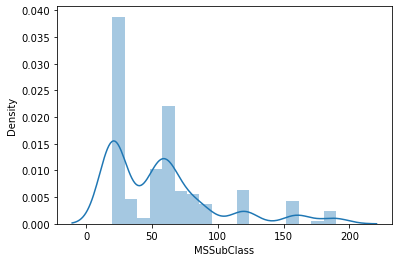

In [15]:
import warnings
warnings.filterwarnings('ignore')
# Visualizing 'MSSubClass' using distplot.
sns.distplot(train['MSSubClass'])

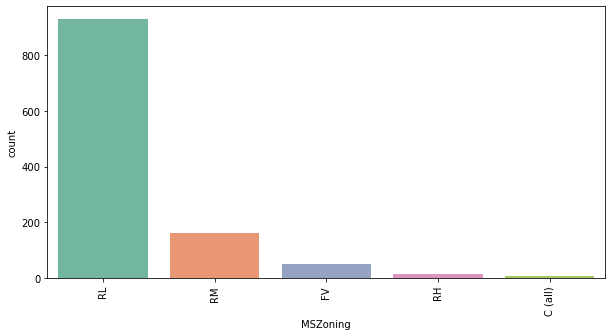

In [16]:
# Visualizing 'MSZoning' using countplot.
plt.figure(figsize=(10,5))
sns.countplot(train['MSZoning'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

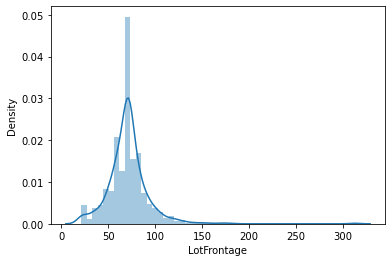

In [17]:
# Visualizing 'LotFrontage' using distplot.
sns.distplot(train['LotFrontage'])

<AxesSubplot:xlabel='LotArea', ylabel='Density'>

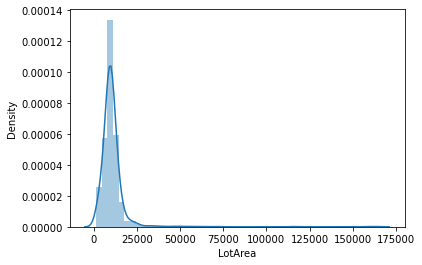

In [18]:
# Visualizing 'LotArea' using distplot.
sns.distplot(train['LotArea'])

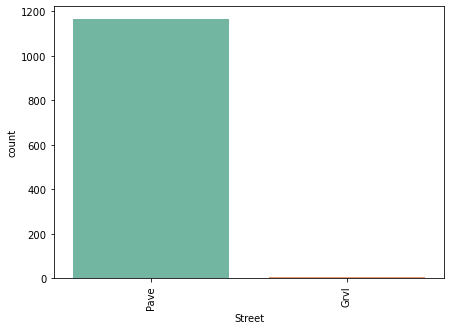

In [19]:
# Visualizing 'Street' using countplot.
plt.figure(figsize=(7,5))
sns.countplot(train['Street'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

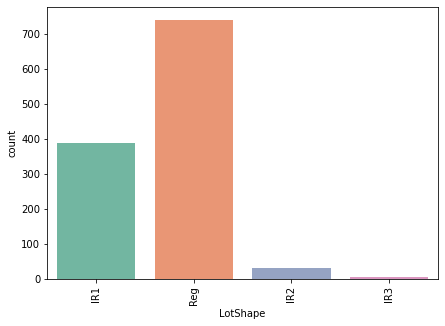

In [20]:
# Visualizing 'LotShape' using countplot.
plt.figure(figsize=(7,5))
sns.countplot(train['LotShape'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

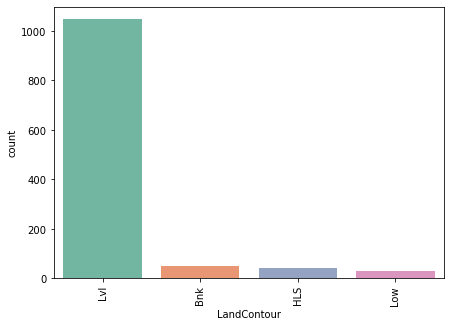

In [21]:
# Visualizing 'LandContour' using countplot.
plt.figure(figsize=(7,5))
sns.countplot(train['LandContour'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

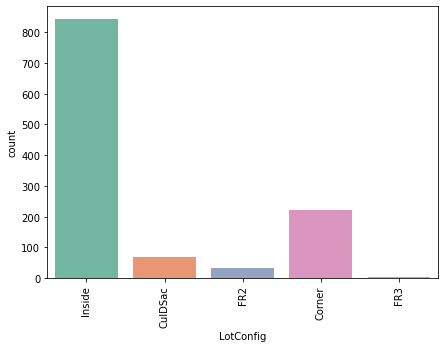

In [22]:
# Visualizing 'LotConFig' using countplot.

plt.figure(figsize=(7,5))
sns.countplot(train['LotConfig'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

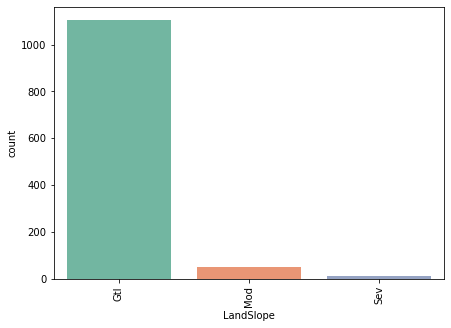

In [23]:
# Visualizing 'LandSlope' using countplot.
plt.figure(figsize=(7,5))
sns.countplot(train['LandSlope'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

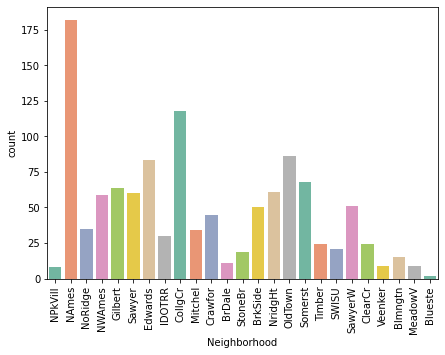

In [24]:
# Visualizing 'Neighborhood' using countplot.
plt.figure(figsize=(7,5))
sns.countplot(train['Neighborhood'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

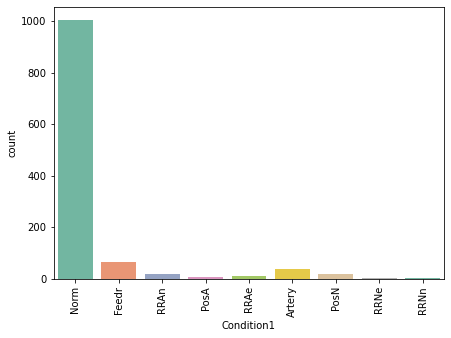

In [25]:
# Visualizing 'Condition1' using countplot.
plt.figure(figsize=(7,5))
sns.countplot(train['Condition1'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

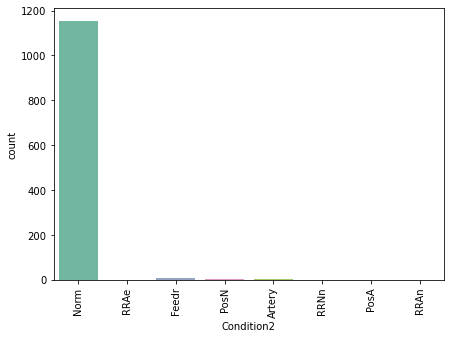

In [26]:
# Visualizing 'Condition2' using countplot.

plt.figure(figsize=(7,5))
sns.countplot(train['Condition2'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

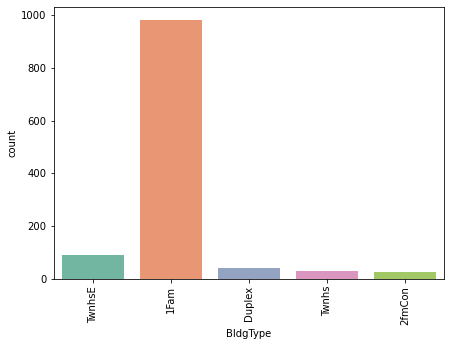

In [27]:
# Visualizing 'BldgType' using countplot.

plt.figure(figsize=(7,5))
sns.countplot(train['BldgType'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

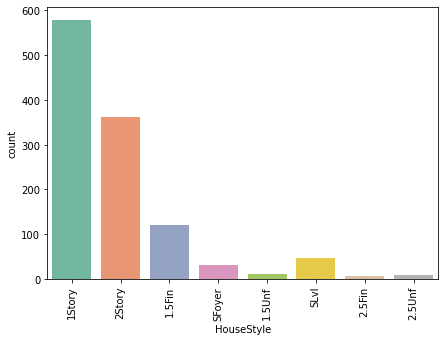

In [28]:
# Visualizing 'HouseStyle' using countplot.

plt.figure(figsize=(7,5))
sns.countplot(train['HouseStyle'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='OverallQual', ylabel='Density'>

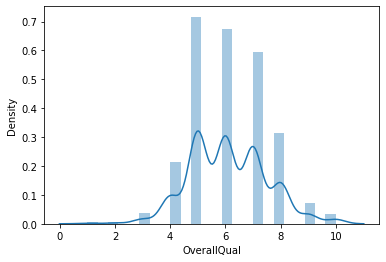

In [29]:
# Visualizing 'OverallQual' using distplot.

sns.distplot(train['OverallQual'])

<AxesSubplot:xlabel='OverallCond', ylabel='Density'>

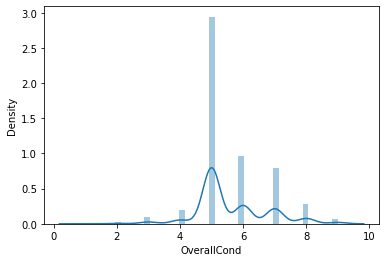

In [30]:
# Visualizing 'OverallCond' using distplot.

sns.distplot(train['OverallCond'])

<AxesSubplot:xlabel='YearBuilt', ylabel='Density'>

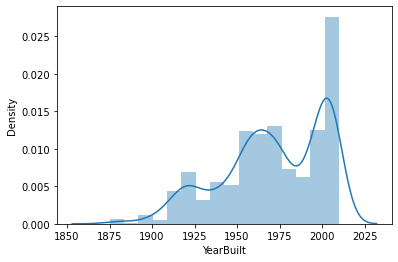

In [31]:
# Visualizing 'YearBuilt' using distplot.

sns.distplot(train['YearBuilt'])

<AxesSubplot:xlabel='YearRemodAdd', ylabel='Density'>

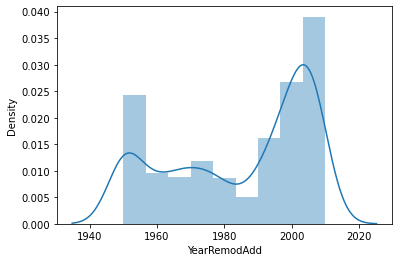

In [32]:
# Visualizing 'YearRemodAdd' using distplot.

sns.distplot(train['YearRemodAdd'])

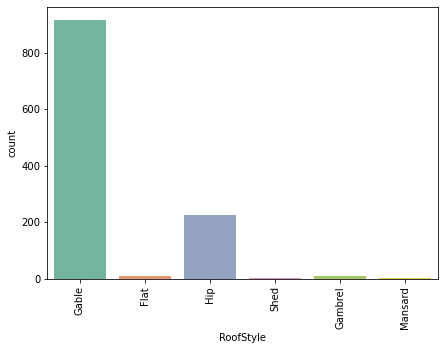

In [33]:
# Visualizing 'RoofStyle' using countplot.

plt.figure(figsize=(7,5))
sns.countplot(train['RoofStyle'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

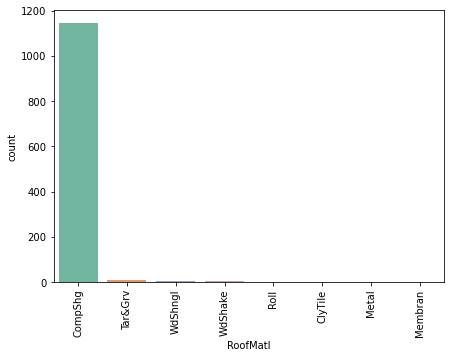

In [34]:
# Visualizing 'RoofMatl' using countplot.

plt.figure(figsize=(7,5))
sns.countplot(train['RoofMatl'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

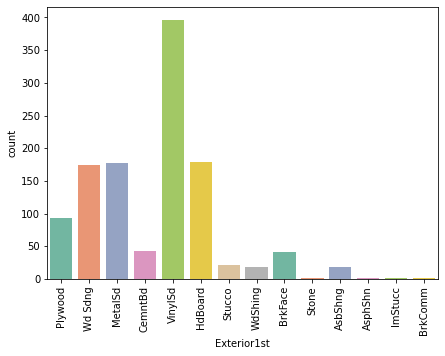

In [35]:
# Visualizing 'Exterior1st' using countplot.

plt.figure(figsize=(7,5))
sns.countplot(train['Exterior1st'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

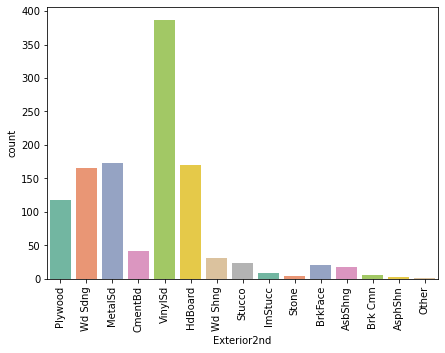

In [36]:
# Visualizing 'Exterior2nd' using countplot.

plt.figure(figsize=(7,5))
sns.countplot(train['Exterior2nd'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

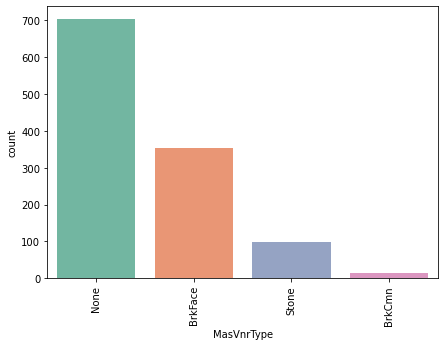

In [37]:
# Visualizing 'ManVnrType' using countplot.
plt.figure(figsize=(7,5))
sns.countplot(train['MasVnrType'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

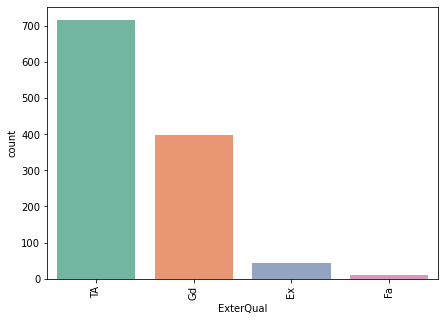

In [38]:
# Visualizing 'ExterQual' using countplot.

plt.figure(figsize=(7,5))
sns.countplot(train['ExterQual'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

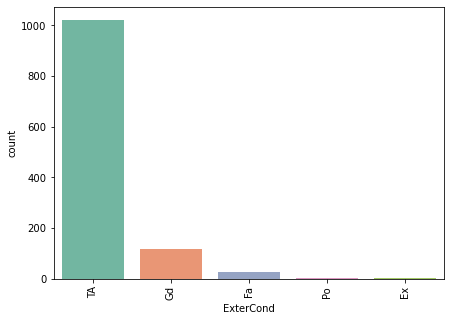

In [39]:
# Visualizing 'ExterCond' using countplot.

plt.figure(figsize=(7,5))
sns.countplot(train['ExterCond'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

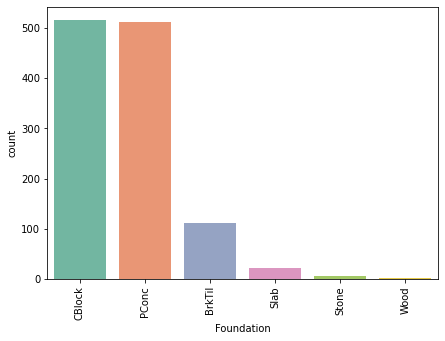

In [40]:
# Visualizing 'Foundation' using countplot.

plt.figure(figsize=(7,5))
sns.countplot(train['Foundation'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

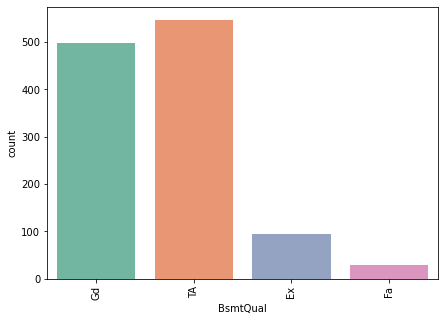

In [41]:
# Visualizing 'BsmtQual' using countplot.

plt.figure(figsize=(7,5))
sns.countplot(train['BsmtQual'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

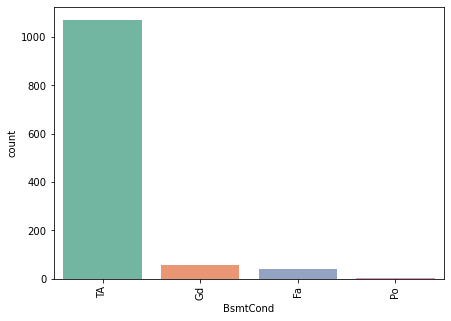

In [42]:
# Visualizing 'Bsmt' using countplot.

plt.figure(figsize=(7,5))
sns.countplot(train['BsmtCond'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

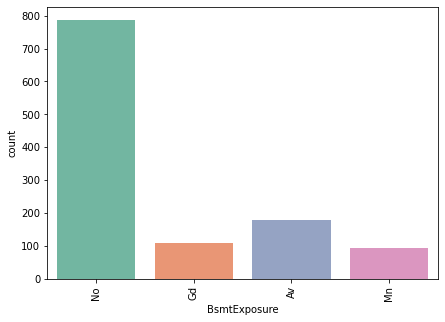

In [43]:
# Visualizing 'Bsmt' using countplot.

plt.figure(figsize=(7,5))
sns.countplot(train['BsmtExposure'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='Density'>

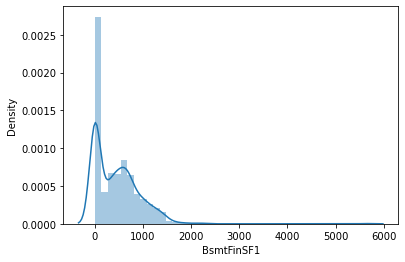

In [44]:
sns.distplot(train['BsmtFinSF1'])

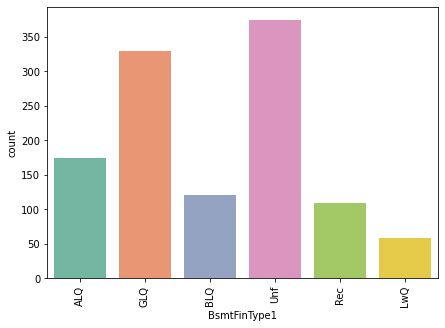

In [45]:
plt.figure(figsize=(7,5))
sns.countplot(train['BsmtFinType1'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

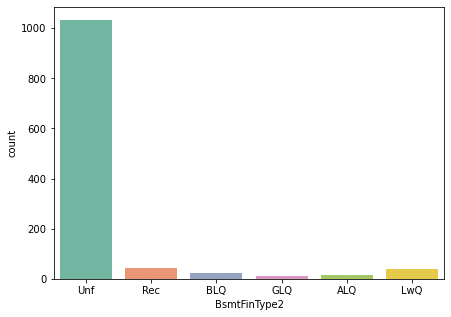

In [46]:
plt.figure(figsize=(7,5))
sns.countplot(train['BsmtFinType2'], palette='Set2')

plt.show()

<AxesSubplot:xlabel='BsmtFinSF2', ylabel='Density'>

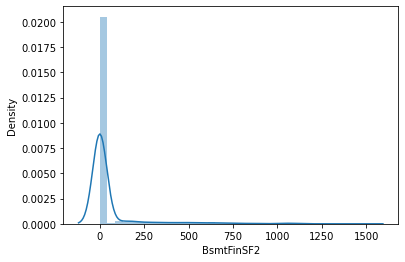

In [47]:
sns.distplot(train['BsmtFinSF2'])

<AxesSubplot:xlabel='BsmtUnfSF', ylabel='Density'>

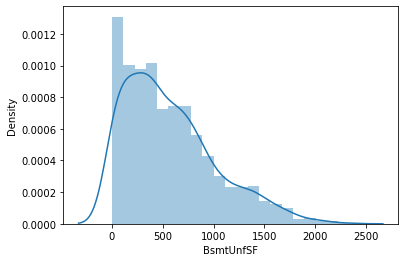

In [48]:
sns.distplot(train['BsmtUnfSF'])

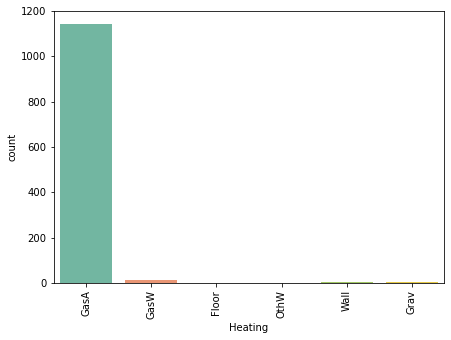

In [49]:
plt.figure(figsize=(7,5))
sns.countplot(train['Heating'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

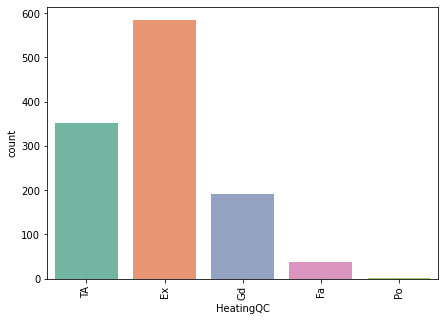

In [50]:
plt.figure(figsize=(7,5))
sns.countplot(train['HeatingQC'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

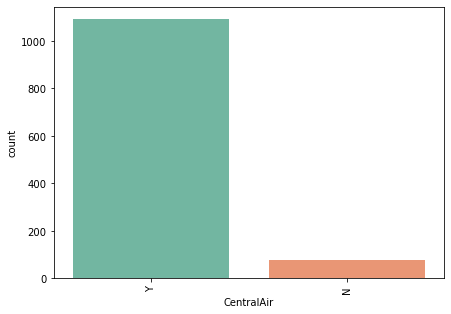

In [51]:
plt.figure(figsize=(7,5))
sns.countplot(train['CentralAir'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

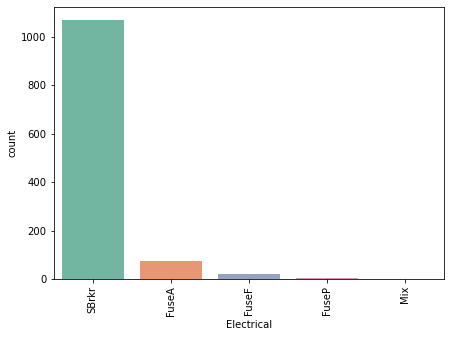

In [52]:
plt.figure(figsize=(7,5))
sns.countplot(train['Electrical'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='1stFlrSF', ylabel='Density'>

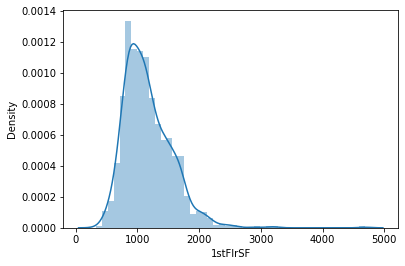

In [53]:
sns.distplot(train['1stFlrSF'])

<AxesSubplot:xlabel='2ndFlrSF', ylabel='Density'>

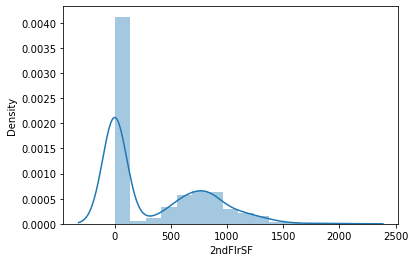

In [54]:
sns.distplot(train['2ndFlrSF'])

<AxesSubplot:xlabel='LowQualFinSF', ylabel='Density'>

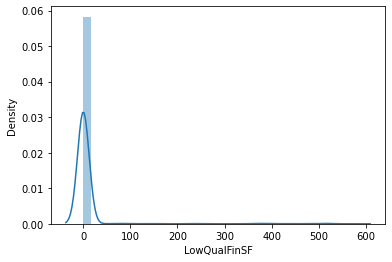

In [55]:
sns.distplot(train['LowQualFinSF'])

<AxesSubplot:xlabel='GrLivArea', ylabel='Density'>

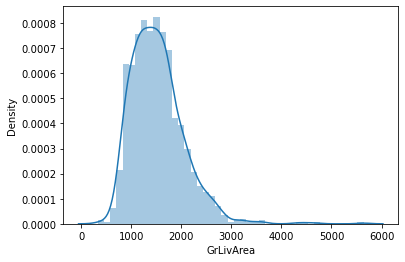

In [56]:
sns.distplot(train['GrLivArea'])

<AxesSubplot:xlabel='BsmtFullBath', ylabel='Density'>

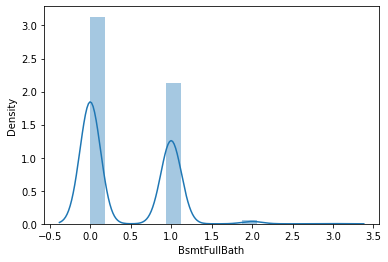

In [57]:
sns.distplot(train['BsmtFullBath'])

<AxesSubplot:xlabel='BsmtHalfBath', ylabel='Density'>

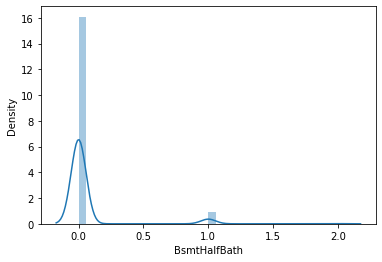

In [58]:
sns.distplot(train['BsmtHalfBath'])

<AxesSubplot:xlabel='FullBath', ylabel='Density'>

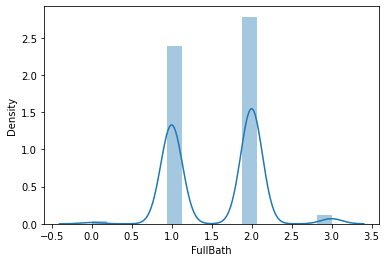

In [59]:
sns.distplot(train['FullBath'])

<AxesSubplot:xlabel='HalfBath', ylabel='Density'>

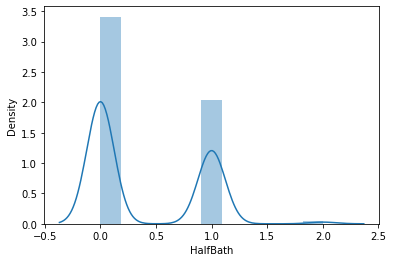

In [60]:
sns.distplot(train['HalfBath'])

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='Density'>

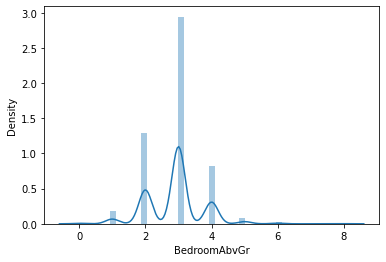

In [61]:
sns.distplot(train['BedroomAbvGr'])

<AxesSubplot:xlabel='KitchenAbvGr', ylabel='Density'>

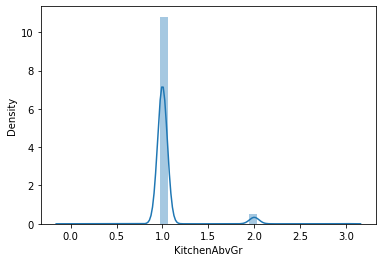

In [62]:
sns.distplot(train['KitchenAbvGr'])

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='Density'>

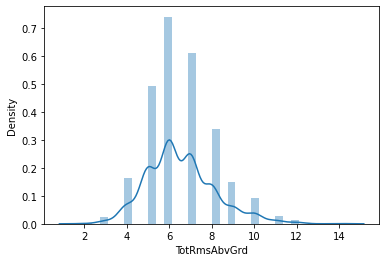

In [63]:
sns.distplot(train['TotRmsAbvGrd'])

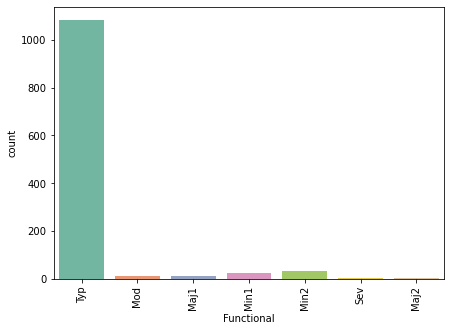

In [64]:
plt.figure(figsize=(7,5))
sns.countplot(train['Functional'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Fireplaces', ylabel='Density'>

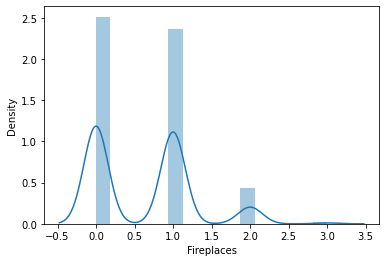

In [65]:
sns.distplot(train['Fireplaces'])

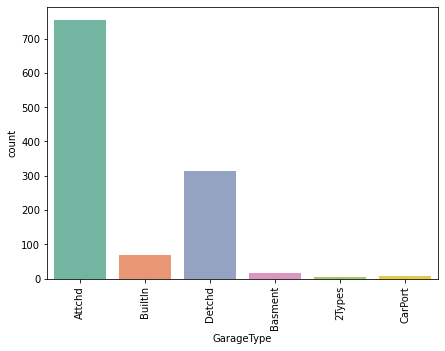

In [66]:
plt.figure(figsize=(7,5))
sns.countplot(train['GarageType'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

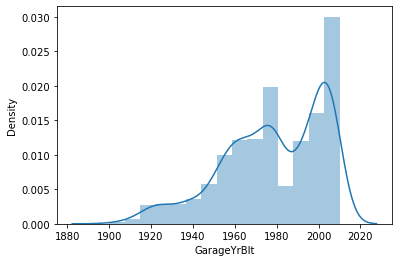

In [67]:
sns.distplot(train['GarageYrBlt'])

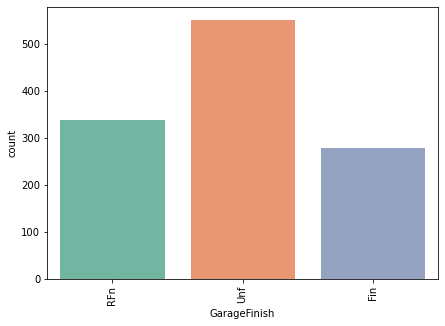

In [68]:
plt.figure(figsize=(7,5))
sns.countplot(train['GarageFinish'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='GarageCars', ylabel='Density'>

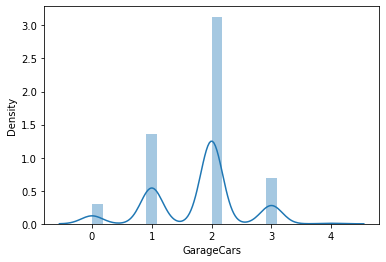

In [69]:
sns.distplot(train['GarageCars'])

<AxesSubplot:xlabel='GarageArea', ylabel='Density'>

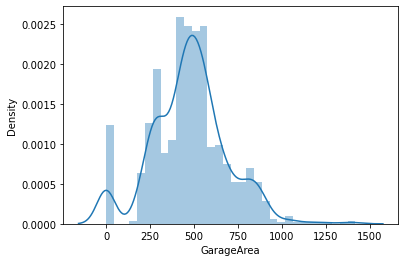

In [70]:
sns.distplot(train['GarageArea'])

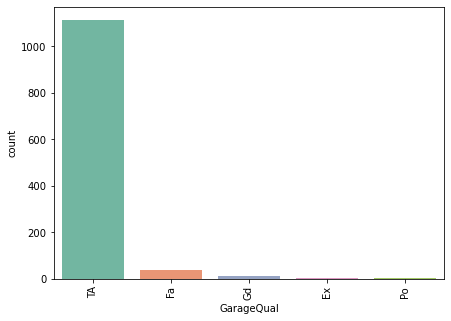

In [71]:
plt.figure(figsize=(7,5))
sns.countplot(train['GarageQual'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

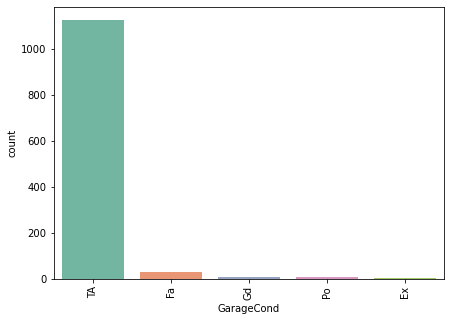

In [72]:
plt.figure(figsize=(7,5))
sns.countplot(train['GarageCond'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

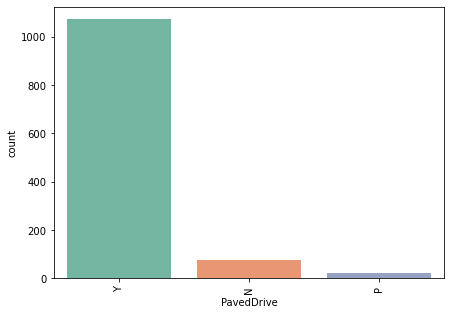

In [73]:
plt.figure(figsize=(7,5))
sns.countplot(train['PavedDrive'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='WoodDeckSF', ylabel='Density'>

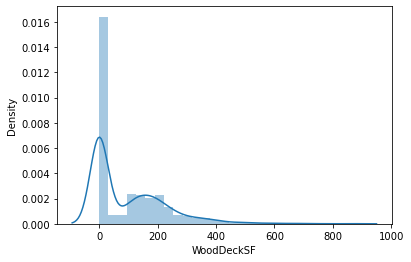

In [74]:
sns.distplot(train['WoodDeckSF'])

<AxesSubplot:xlabel='OpenPorchSF', ylabel='Density'>

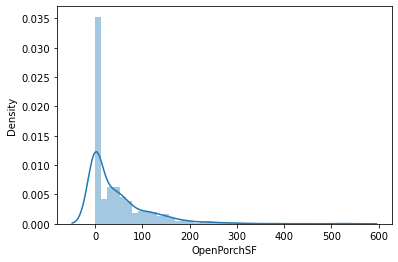

In [75]:
sns.distplot(train['OpenPorchSF'])

<AxesSubplot:xlabel='EnclosedPorch', ylabel='Density'>

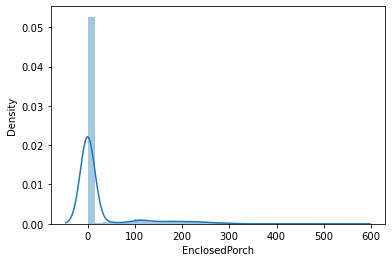

In [76]:
sns.distplot(train['EnclosedPorch'])

<AxesSubplot:xlabel='3SsnPorch', ylabel='Density'>

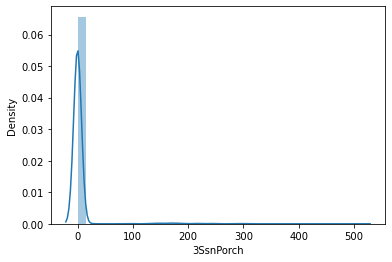

In [77]:
sns.distplot(train['3SsnPorch'])

<AxesSubplot:xlabel='ScreenPorch', ylabel='Density'>

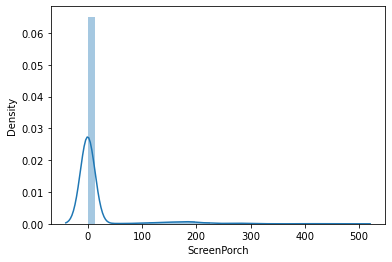

In [78]:
sns.distplot(train['ScreenPorch'])

<AxesSubplot:xlabel='PoolArea', ylabel='Density'>

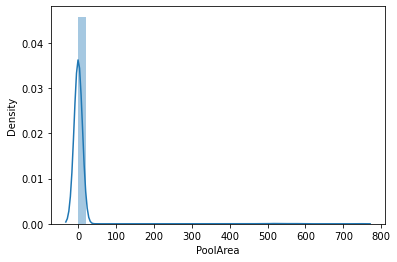

In [79]:
sns.distplot(train['PoolArea'])

<AxesSubplot:xlabel='MiscVal', ylabel='Density'>

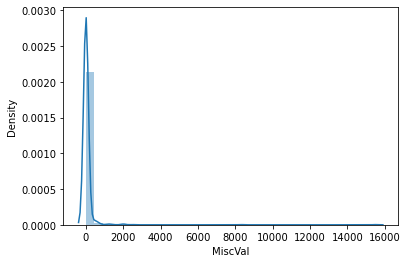

In [80]:
sns.distplot(train['MiscVal'])

<AxesSubplot:xlabel='MoSold', ylabel='Density'>

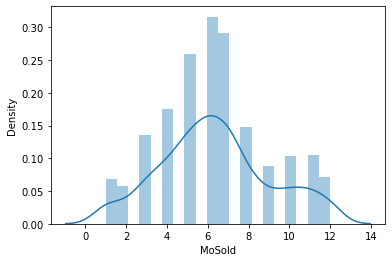

In [81]:
sns.distplot(train['MoSold'])

<AxesSubplot:xlabel='YrSold', ylabel='Density'>

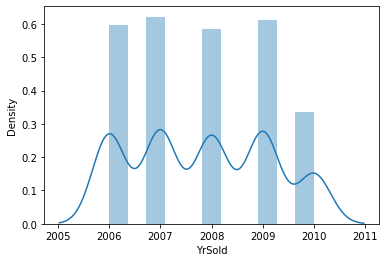

In [82]:
sns.distplot(train['YrSold'])

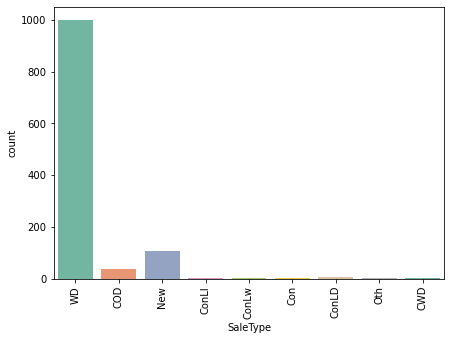

In [83]:
plt.figure(figsize=(7,5))
sns.countplot(train['SaleType'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

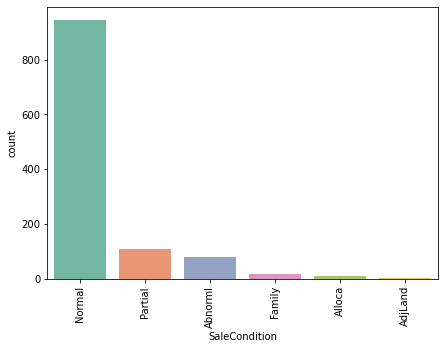

In [84]:
plt.figure(figsize=(7,5))
sns.countplot(train['SaleCondition'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

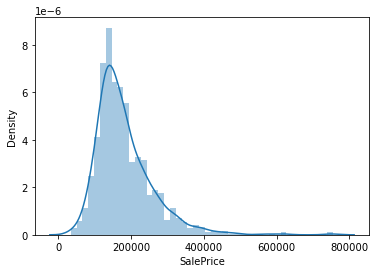

In [85]:
sns.distplot(train['SalePrice'])

1.lotFrontage: Almost all houses have LotFrontage between 20 to 150

2.lotArea: Around 580 house have lot Area between (0-10000)sqft. Very few houses have lot area aound 120000sqft & around 160000sqft

3.OverallQual: Rates the overall material and finish of the house, Around 300 houses sold were in average condition. Only 10-15 houses were in excellent condition.

4.YearBuilt: Original construction date, More number of people have brought the houses build after 1990.

5.MasVnrArea: Masonry veneer area in square feet, 50% of houses have Masonry veneer area as '0-50' and out of rest 50% houses most houses have Masonry veneer area 50-1200

6.BsmtFinSF1: Type 1 finished square feet, Most houses have Type 1 finished square feet area of basement between 0 and 1500

7.BsmtFinSF2: Type 2 finished square feet, Around 1000 houses have Type 2 finished square feet area of 0

8.BsmtUnfSF: Unfinished square feet of basement area, Around 130 houses have unfinished basement of area around 100-500 sqft.

9.1stFlrSF: First Floor square feet, Around 280 houses have 1st floor square feet area between 800-1200sqft.

10.GrLivArea: Above grade (ground) living area square feet, Most houses have above ground living sq ft area in between 800 to 3000

11.BsmtFullBath: Basement full bathrooms,50% houses have no full bathrooms in basement and in remaining houses most have 1 full bathroom in basement and very few has 2 full bathrooms.

12.FullBath: Full bathrooms above grade,25% houses have 1 full bathrooms above ground and 50% have 2 full bathrooms located above ground and very less have 3.

13.HalfBath: Half baths above grade, around 700 houses have no half bathrooms very few has 1 half bathroom.

14.Bedroom: Bedrooms above grade (does NOT include basement bedrooms), Most houses have 3 bedrooms above ground followed by 2 and 4.

15.Kitchen: Kitchens above grade, Maximum houses have 1 Kitchen. very few have 2.

16.TotRmsAbvGrd: Total rooms above grade (does not include bathrooms), Around 300 houses have 6 rooms, around 200 have 5, &250 have 7. Very few have 12 & 14 rooms.

17.Fireplaces: Number of fireplaces, Most houses have 0 fireplaces followed by 1.

18.GarageCars : Size of garage in car capacity, Most houses have garage with 2 car capcity.

19.GarageArea : Size of garage in square feet, Most houses have Garage area in between 200 to 800.

20.woodDeckSF : Wood deck area in square feet, More than 50% of houses have 0 Wood Deck sqft area and rest have in between 0 to 400

21.OpenPorchSF : Open porch area in square feet, 25% of houses have 0 open porch sqft area and rest have in between 0 to 300

22.EnclosedPorch : Enclosed porch area in square feet, Almost all houses have 0 enclosed porch sqft area

23.ScreenPorch : Screen porch area in square feet, Almost all houses have 0 screen porch area sqft

24.Sale Price : Around 500 houses have sale price in between 100000 to 200000. Very few houses have sale price of 600000 & 700000

# Bivariate Data Analysis

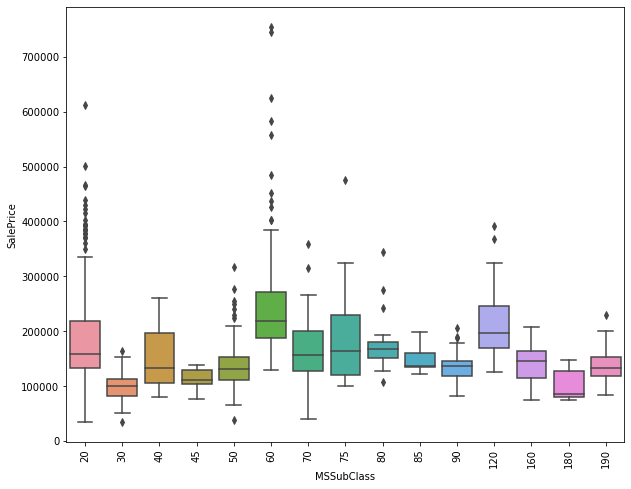

In [86]:
# Visualizing MSSubclass vs Salesprice using boxplot.

plt.figure(figsize=(10,8))
sns.boxplot(x='MSSubClass',y='SalePrice',data=train.sort_values('SalePrice',ascending=False))
plt.xticks(rotation=90)
plt.show()

Maximum MSSubclass is 60 having salesprice approx.600000

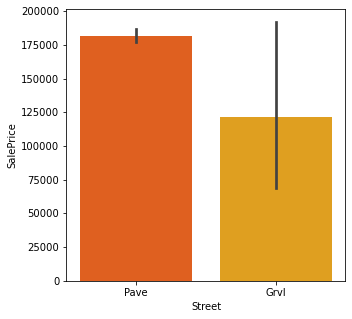

In [87]:
# Visualizing saleprice vs Stree using barplot.

plt.figure(figsize=[5,5])
sns.barplot(x='Street', y='SalePrice', data = train.sort_values('SalePrice', ascending=False),palette='autumn')
plt.show()

From bove we can observe that the property with Pave have more demand hence have high price.

<Figure size 576x288 with 0 Axes>

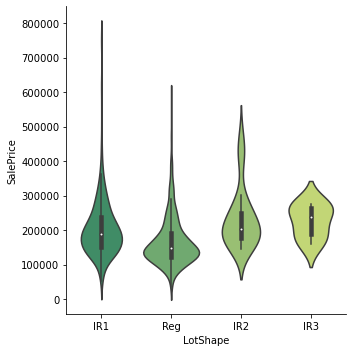

In [88]:
# Visualizing LotShape vs Saleprice using barplot.

plt.figure(figsize=[8,4])
sns.catplot(x='LotShape', y='SalePrice', data=train, kind = 'violin',palette='summer')
plt.show()

<Figure size 576x288 with 0 Axes>

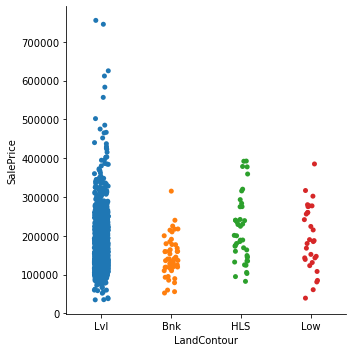

In [89]:
# Visualizing LandContour vs Salesprice using strip plot.
plt.figure(figsize=[8,4])
sns.catplot(x='LandContour', y='SalePrice', data=train)

Saleprice for LandContour LvI is high.

<Figure size 432x288 with 0 Axes>

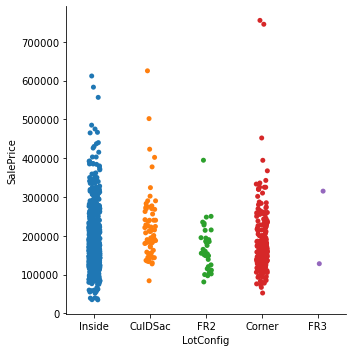

In [90]:
# Visualizing the Lotconfig vs Saleprice using strip plot. 

plt.figure(figsize=[6,4])
sns.catplot(x='LotConfig', y='SalePrice', data=train)

 LotConfig Inside has high saleprice.

<Figure size 576x432 with 0 Axes>

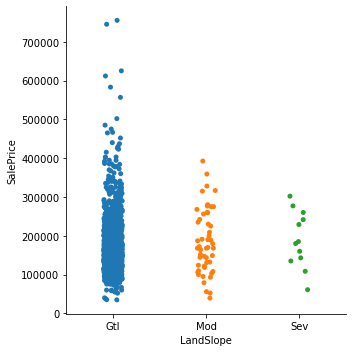

In [91]:
# Visualizing LandSlope vs Saleprice using strip plot.
plt.figure(figsize=[8,6])
sns.catplot(x='LandSlope', y='SalePrice', data=train)

Landslope Mod has highest quantity with higher sale price.

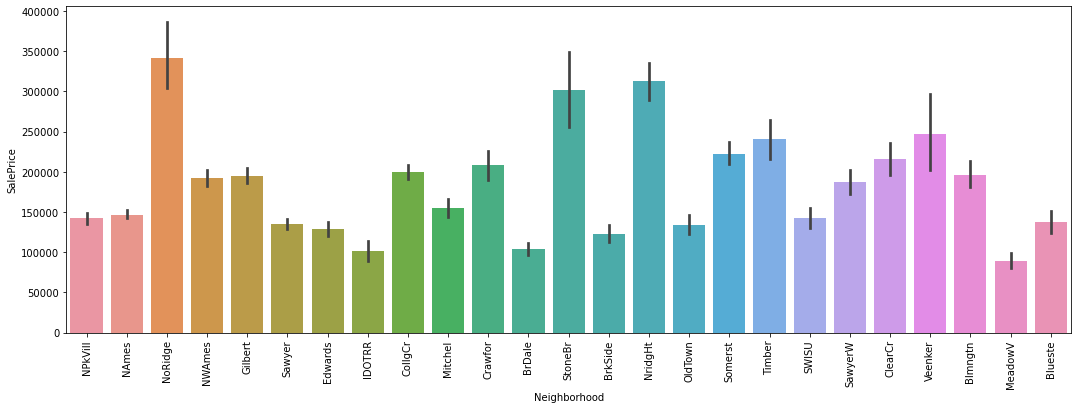

In [92]:
# Visualizing Neighborhood vs saleprice using barplot.
plt.figure(figsize=[18,6])
sns.barplot(x='Neighborhood', y='SalePrice', data= train)
plt.xticks(rotation=90)
plt.show()

Neighborhood  NoRidge has highest saleprice then NridgHt.

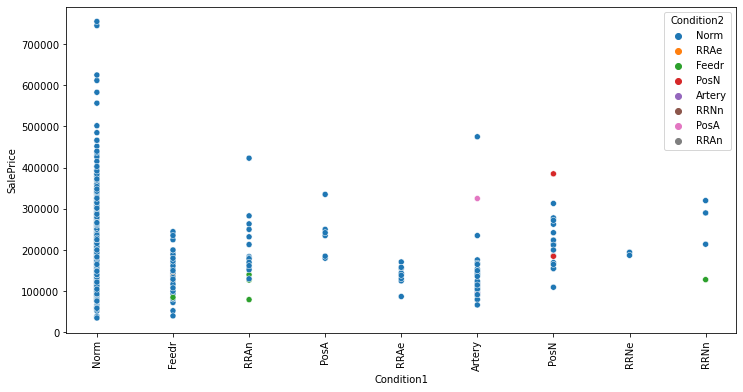

In [93]:
# Visualizing Condition1 vs Saleprice using scatterplot.
plt.figure(figsize=[12,6])
sns.scatterplot(x='Condition1', y='SalePrice', hue='Condition2', data=train)
plt.xticks(rotation=90)
plt.show()

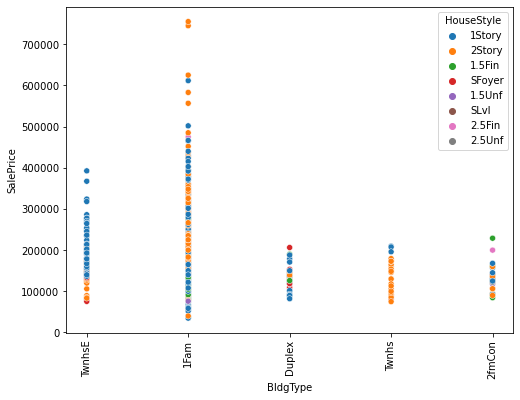

In [94]:
# Visualizing BldgType vs salesprice regarding Housestyle.
plt.figure(figsize=[8,6])
sns.scatterplot(x= 'BldgType', y='SalePrice', hue = 'HouseStyle', data = train)
plt.xticks(rotation = 90)
plt.show()

<Figure size 576x432 with 0 Axes>

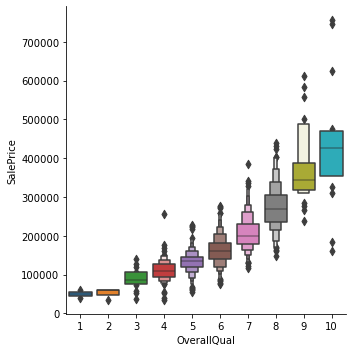

In [95]:
# Visualizing OverallQual vs price using box plot.
plt.figure(figsize=[8,6])
sns.catplot(x='OverallQual', y='SalePrice', data = train, kind = 'boxen')
plt.show()

The Saleprice is increasing as OverallQual is increasing.

<Figure size 576x432 with 0 Axes>

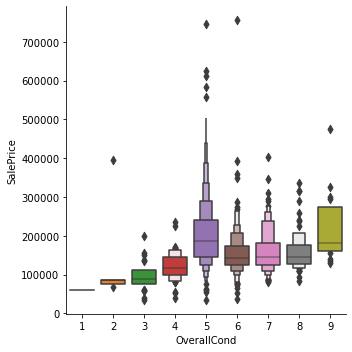

In [96]:
# Let's check for the saleprices based on the ratings of overall condition of the house
plt.figure(figsize=[8,6])
sns.catplot(x='OverallCond', y='SalePrice', data = train, kind = 'boxen')
plt.show()

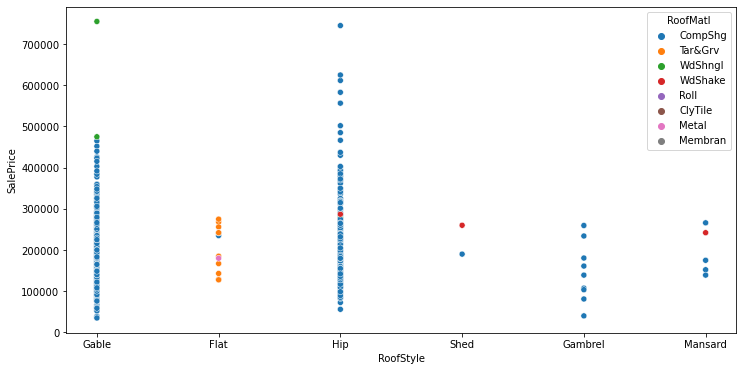

In [97]:
# Visualizing Roofstyle vs Saleprice regarding the RoofMatL.
plt.figure(figsize=[12,6])
sns.scatterplot(x='RoofStyle', y='SalePrice', hue = 'RoofMatl', data = train)
plt.show()

Gable with wdShngl has highest saleprice.

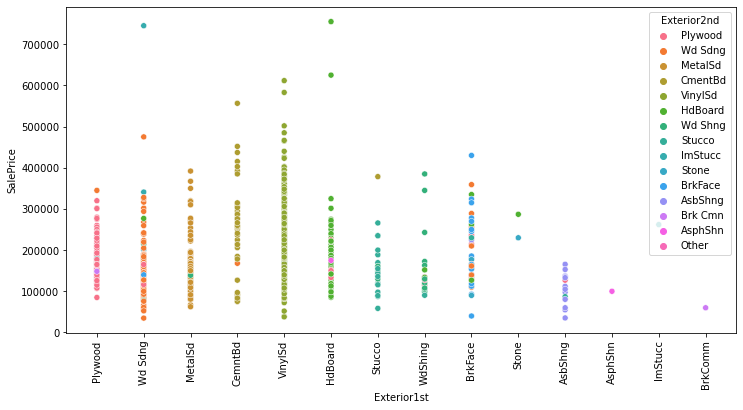

In [98]:
# Visualzing Exterior vs saleprice regarding Exterior2nd.
plt.figure(figsize=[12,6])
sns.scatterplot(x='Exterior1st', y='SalePrice', hue = 'Exterior2nd', data = train)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

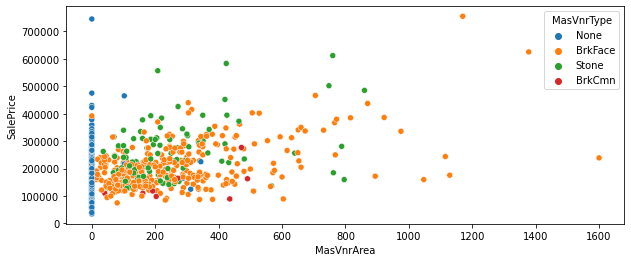

In [99]:
# Visualizing MasVnrArea vs saleprice regarding MasVnrType.
plt.figure(figsize=[10,4])
sns.scatterplot(x='MasVnrArea', y='SalePrice', hue = 'MasVnrType', data = train)

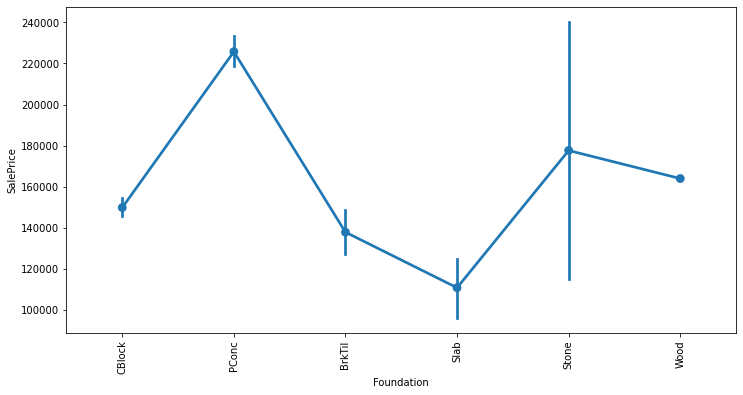

In [100]:
# Visualizing Foundation vs saleprice.
plt.figure(figsize=[12,6])
sns.pointplot(x='Foundation', y = 'SalePrice', data=train)
plt.xticks(rotation=90)
plt.show()

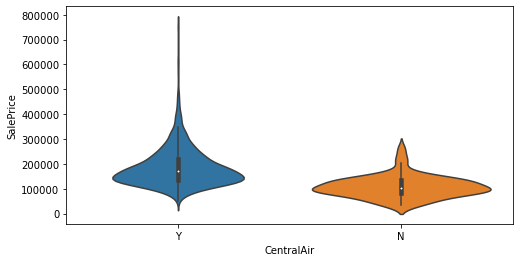

In [101]:
# Visualizing Central vs saleprice.
plt.figure(figsize=[8,4])
sns.violinplot(x='CentralAir', y='SalePrice', data=train)
plt.show()

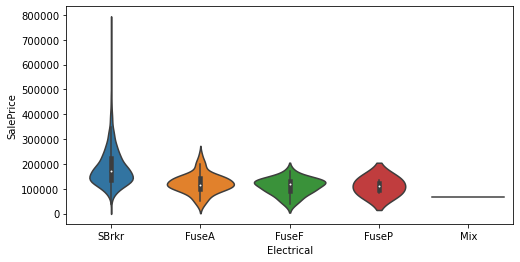

In [102]:
# Visualizing Electrical vs saleprice.
plt.figure(figsize=[8,4])
sns.violinplot(x='Electrical', y='SalePrice', data=train)
plt.show()

# Checking Correlation

In [103]:
train.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.336681,-0.124151,0.070462,-0.056978,0.023988,0.056618,0.027813,-0.052236,-0.062403,...,-0.022609,0.017468,-0.004252,-0.043210,-0.013291,0.009583,-0.023503,-0.016015,-0.038595,-0.060775
LotFrontage,-0.336681,1.000000,0.299452,0.229218,-0.047573,0.112655,0.088799,0.188758,0.228996,0.002159,...,0.088334,0.151328,0.020902,0.051084,0.030405,0.196001,-0.001329,0.022517,-0.003885,0.323779
LotArea,-0.124151,0.299452,1.000000,0.107188,0.017513,0.005506,0.027228,0.121086,0.221851,0.056656,...,0.216720,0.093080,-0.007446,0.025794,0.025256,0.097107,0.051679,0.015141,-0.035399,0.249499
OverallQual,0.070462,0.229218,0.107188,1.000000,-0.083167,0.575800,0.555945,0.407230,0.219643,-0.040893,...,0.227137,0.341030,-0.098374,0.045919,0.059387,0.072247,-0.025786,0.090638,-0.048759,0.789185
OverallCond,-0.056978,-0.047573,0.017513,-0.083167,1.000000,-0.377731,0.080669,-0.137475,-0.028810,0.044336,...,0.012290,-0.024899,0.056074,0.040476,0.069463,-0.003603,0.075178,0.005519,0.055517,-0.065642
YearBuilt,0.023988,0.112655,0.005506,0.575800,-0.377731,1.000000,0.592829,0.321905,0.227933,-0.027682,...,0.204830,0.191069,-0.373544,0.037079,-0.058760,0.006408,-0.030008,0.031754,-0.013976,0.514408
YearRemodAdd,0.056618,0.088799,0.027228,0.555945,0.080669,0.592829,1.000000,0.181385,0.114430,-0.044694,...,0.197410,0.238755,-0.193574,0.064763,-0.046220,0.006874,-0.001199,0.024663,0.033265,0.507831
MasVnrArea,0.027813,0.188758,0.121086,0.407230,-0.137475,0.321905,0.181385,1.000000,0.265735,-0.065707,...,0.151579,0.130885,-0.101941,0.018720,0.046498,0.013590,-0.027582,0.013363,-0.013462,0.463626
BsmtFinSF1,-0.052236,0.228996,0.221851,0.219643,-0.028810,0.227933,0.114430,0.265735,1.000000,-0.052145,...,0.192939,0.108802,-0.082351,0.025485,0.033490,0.154769,0.008314,0.007482,0.005614,0.362874
BsmtFinSF2,-0.062403,0.002159,0.056656,-0.040893,0.044336,-0.027682,-0.044694,-0.065707,-0.052145,1.000000,...,0.094690,-0.014103,0.032081,-0.031263,0.076561,0.045990,0.007915,-0.014605,0.038438,-0.010151


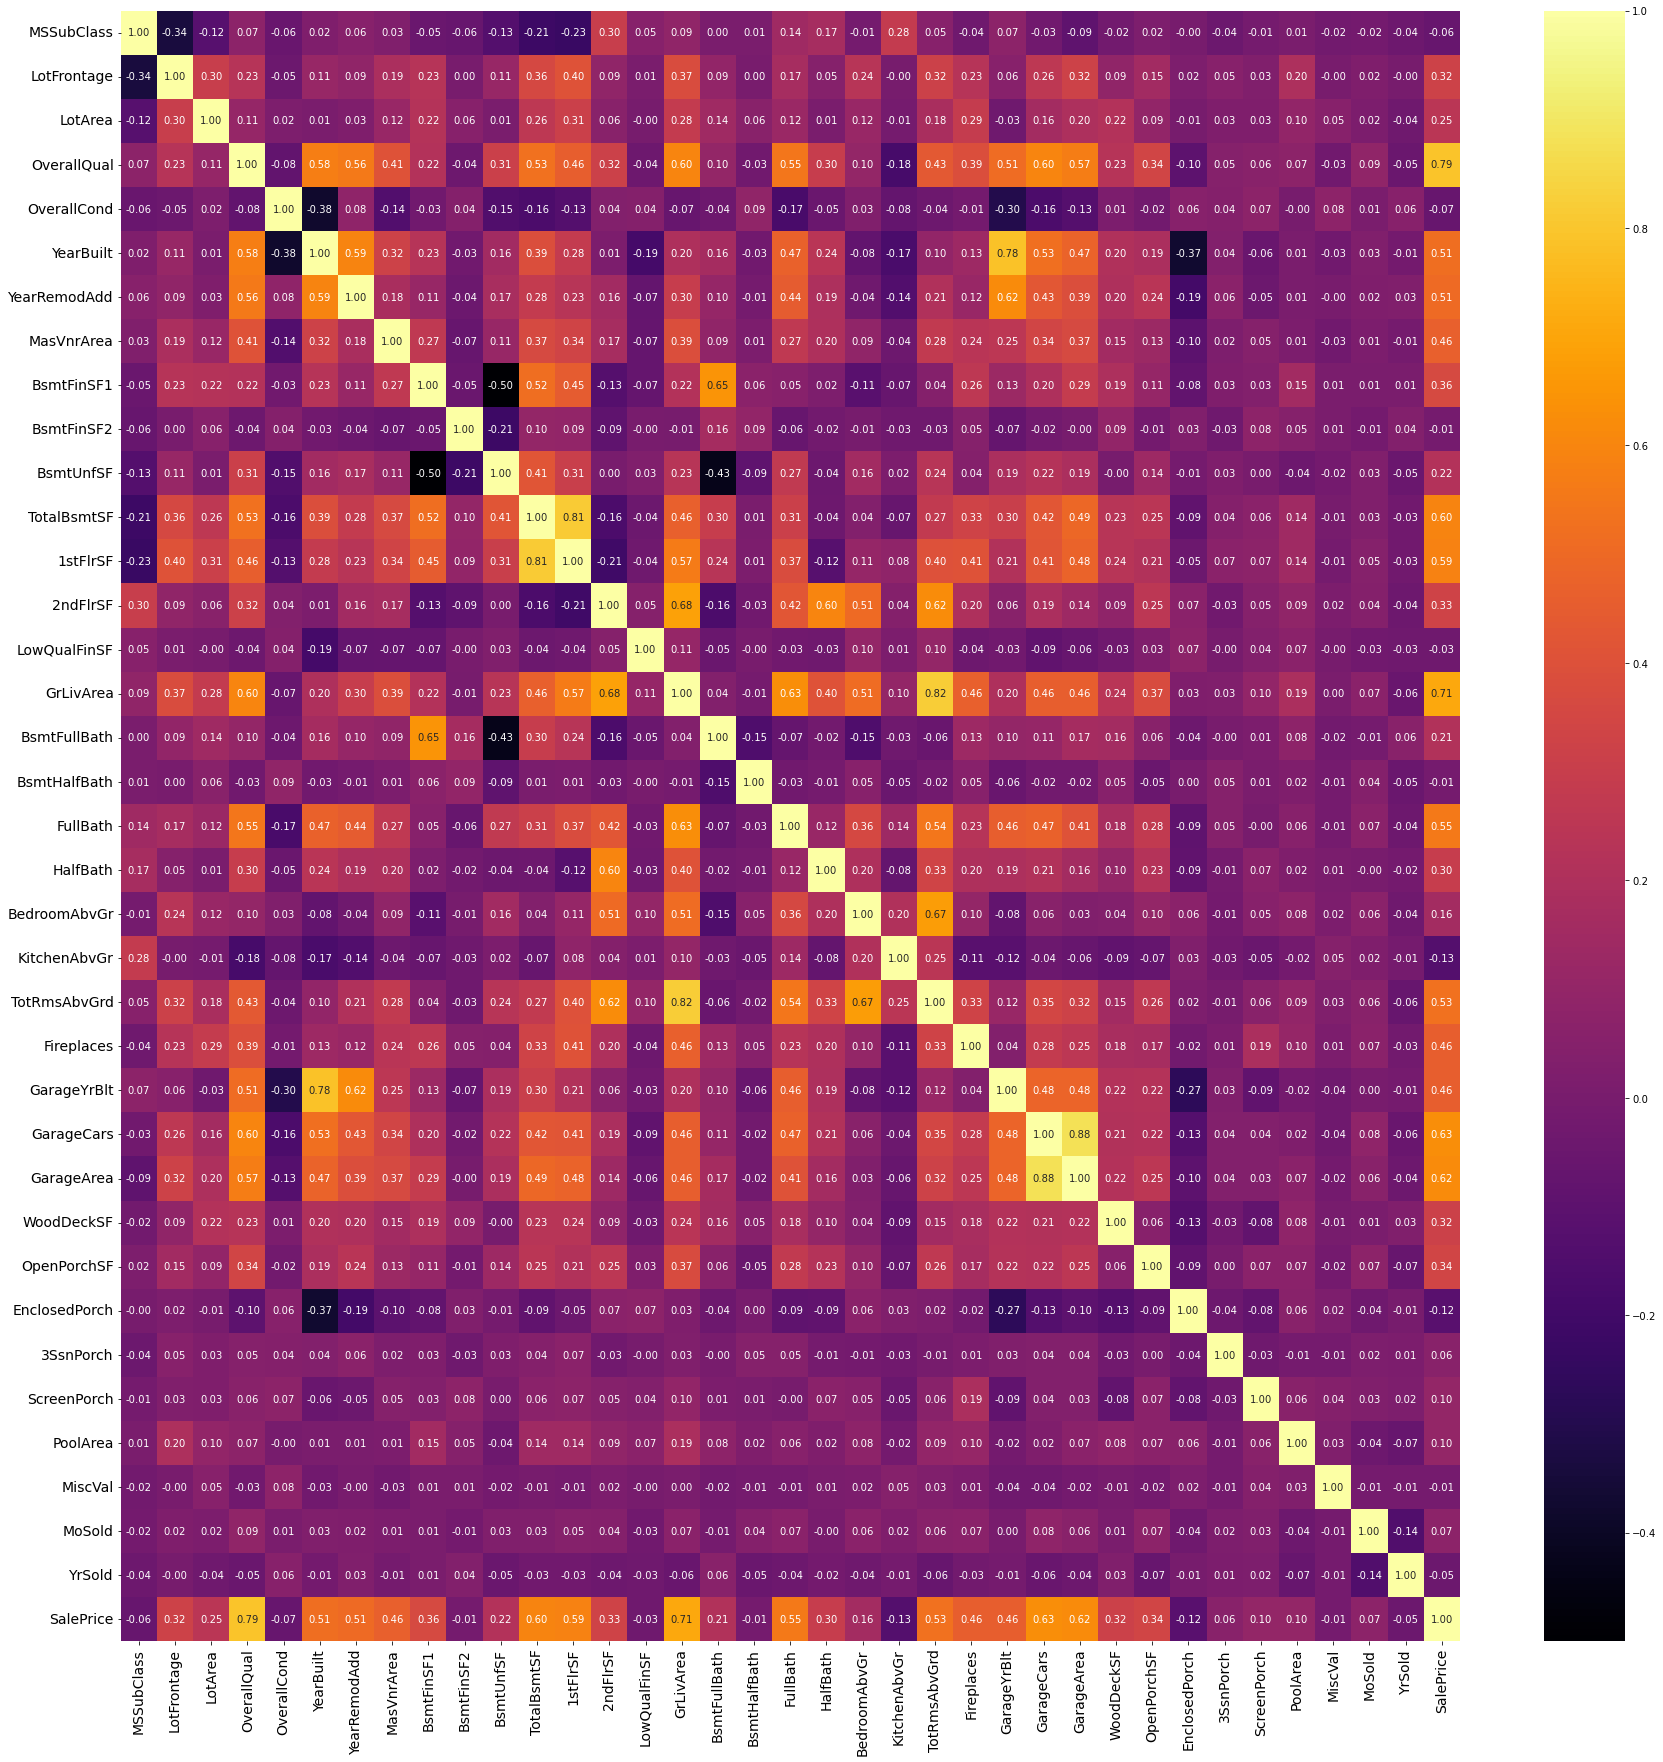

In [104]:
# Visualization of Correlation using heatmap.

plt.figure(figsize=(30,30))
sns.heatmap(train.corr(),annot=True,cmap='inferno',fmt='0.2f')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

MSSubClass’,'OverallCond’,'LowQualFinSF’,'BsmtHalfBath’,'KitchenAbvGr’,'YrSold','EnclosedPorch','MiscVal' are negatively correlated with the target column, rest all are positively correlated.

'OverallQual' & 'GrLivArea' are highly positively correlated with target column.

'MSSubClass','OverallCond','OverallCond’,'LowQualFinSF’,'BsmtHalfBath’,'YrSold', 'MiscVal', 'MoSold', '3SsnPorch' are least correlated with the target column.

 Separating the Object data type documns and numerica data type columns for encoding.

In [105]:
# Separating the Object data type documns and numerica data type columns for encoding.

object_data = []
for x in train.dtypes.index:
    if train.dtypes[x] == 'O':
        object_data.append(x)        
print(f"Object Data Column ", object_data)

numeric_data = []
for x in train.dtypes.index:
    if train.dtypes[x] == 'int64' or train.dtypes[x] == 'float64':
        numeric_data.append(x)
print(f"\nNumeric Data Column:", numeric_data)

Object Data Column  ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

Numeric Data Column: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'Scree

# Data Encoding

In [106]:
# Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
def ordinal_encode(data, column):
    data[column] = oe.fit_transform(data[column])
    return data

data=ordinal_encode(train, object_data)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3.0,70.98847,4928,1.0,0.0,3.0,4.0,0.0,13.0,...,0,0,0,0,0,2,2007,8.0,4.0,128000
1,20,3.0,95.00000,15865,1.0,0.0,3.0,4.0,1.0,12.0,...,0,0,224,0,0,10,2007,8.0,4.0,268000
2,60,3.0,92.00000,9920,1.0,0.0,3.0,1.0,0.0,15.0,...,0,0,0,0,0,6,2007,8.0,4.0,269790
3,20,3.0,105.00000,11751,1.0,0.0,3.0,4.0,0.0,14.0,...,0,0,0,0,0,1,2010,0.0,4.0,190000
4,20,3.0,70.98847,16635,1.0,0.0,3.0,2.0,0.0,14.0,...,0,0,0,0,0,6,2009,8.0,4.0,215000


In [107]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3.0,70.98847,4928,1.0,0.0,3.0,4.0,0.0,13.0,...,0,0,0,0,0,2,2007,8.0,4.0,128000
1,20,3.0,95.00000,15865,1.0,0.0,3.0,4.0,1.0,12.0,...,0,0,224,0,0,10,2007,8.0,4.0,268000
2,60,3.0,92.00000,9920,1.0,0.0,3.0,1.0,0.0,15.0,...,0,0,0,0,0,6,2007,8.0,4.0,269790
3,20,3.0,105.00000,11751,1.0,0.0,3.0,4.0,0.0,14.0,...,0,0,0,0,0,1,2010,0.0,4.0,190000
4,20,3.0,70.98847,16635,1.0,0.0,3.0,2.0,0.0,14.0,...,0,0,0,0,0,6,2009,8.0,4.0,215000


We have successfully encoded the columns in our dataset.

# Checking for the outliers

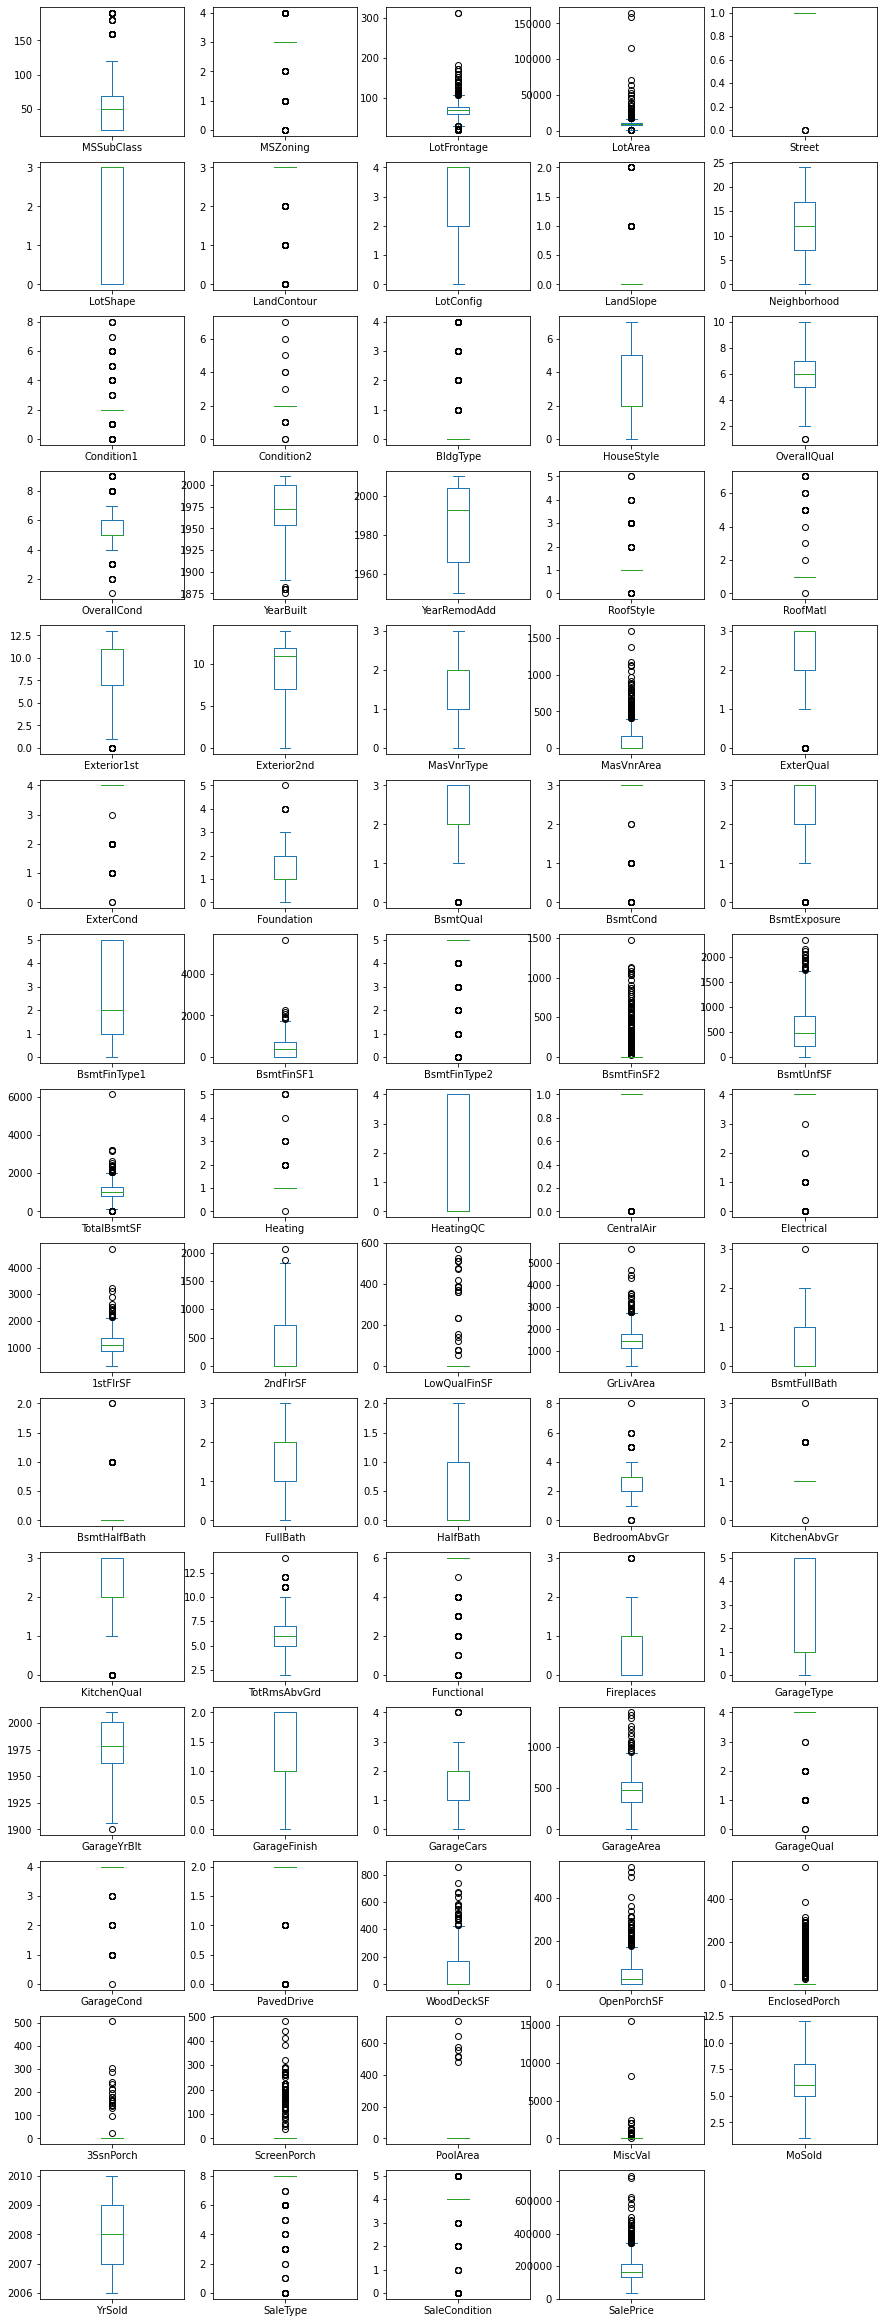

In [108]:
train.plot(kind='box', subplots=True, layout=(16,5), legend=True, figsize=(15,45))
plt.show()

'MSSubClass','MSZoning','LotFrontage','LotArea','Street','LandContour','LandSlope','Condition1','Condition2','BldgType','OverallQual','OverallCond','YearBuilt','RoofStyle','RoofMatl','Exterior1st','MasVnrArea','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Heating','CentralAir','Electrical','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','GarageYrBlt','GarageCars','GarageArea','GarageQual','GarageCond','PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SaleType','SaleCondition','SalePrice' shows outliers but after treating them we are losing the huge amount of data.so we will continue with the outliers.

# Checking Skewness

In [109]:
train.skew().sort_values()

Street       -17.021969
GarageCond    -5.422472
GarageQual    -4.582386
Functional    -3.999663
SaleType      -3.660513
                ...    
Heating       10.103609
LotArea       10.659285
Condition2    11.514458
PoolArea      13.243711
MiscVal       23.065943
Length: 74, dtype: float64

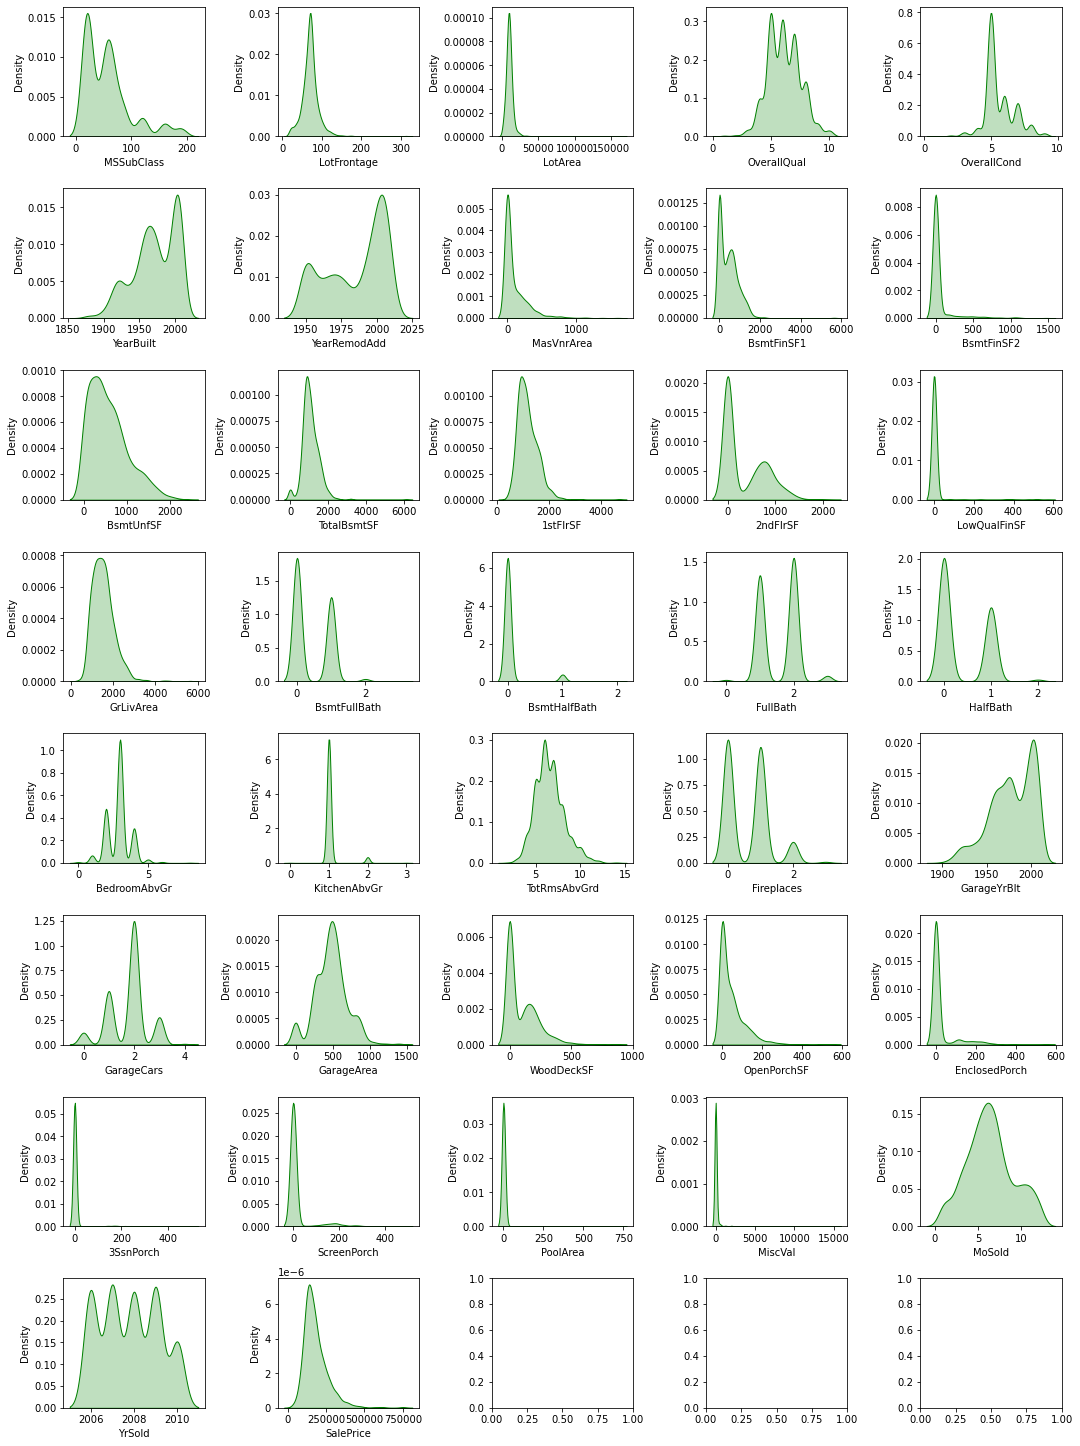

In [110]:
# Visualizing the skewness in the dataset for better understanding.

fig, ax = plt.subplots(ncols=5, nrows=8, figsize=(15,20))
index = 0
ax = ax.flatten()
for col, value in data[numeric_data].items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

We will check the skewness of numeric data type columns.

In [111]:
data[numeric_data].skew()

MSSubClass        1.422019
LotFrontage       2.710383
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.834658
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.662934
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
SalePrice         1.953878
d

In [112]:
# Separating the columns that have skewness for removal.
removal = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [113]:
# Skewness handling using PowerTransformation(yeo-johnson) method.
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [114]:
train[removal] = scaler.fit_transform(train[removal].values)
train[removal].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1.370435,0.093658,-1.213954,-0.052799,-0.496528,0.026859,-0.613054,-0.822734,-0.112649,-0.363019,...,-0.113082,-0.959773,1.409990,-0.411301,-0.138554,-0.297551,-0.077648,-0.193133,-1.719437,-0.604806
1,-1.167999,1.117135,1.100521,1.345826,0.407009,-0.185817,-0.854247,-0.822734,0.394677,2.756067,...,0.678810,0.781991,1.414498,-0.411301,-0.138554,3.360787,-0.077648,-0.193133,1.320612,-0.604806
2,0.490047,0.998803,0.158048,0.656375,-0.496528,0.836680,0.495717,-0.822734,0.925416,-0.363019,...,-0.045422,1.043999,1.198911,-0.411301,-0.138554,-0.297551,-0.077648,-0.193133,-0.076750,-0.604806
3,-1.167999,1.495566,0.496002,-0.052799,0.407009,0.063582,-0.569998,1.382984,0.797133,-0.363019,...,0.356726,-0.959773,1.169545,-0.411301,-0.138554,-0.297551,-0.077648,-0.193133,-2.209015,1.649761
4,-1.167999,0.093658,1.196626,-0.052799,1.234321,0.063582,0.694762,1.138552,1.176115,-0.363019,...,0.282610,1.135369,-1.061392,-0.411301,-0.138554,-0.297551,-0.077648,-0.193133,-0.076750,0.899576


In [115]:
# Let's check the skewness after skewness removal.
train[removal].skew()

MSSubClass        0.064007
LotFrontage       0.161368
LotArea           0.032509
OverallQual       0.021658
OverallCond       0.048063
YearBuilt        -0.126641
YearRemodAdd     -0.225131
MasVnrArea        0.416370
BsmtFinSF1       -0.404528
BsmtFinSF2        2.394737
BsmtUnfSF        -0.284390
TotalBsmtSF       0.286779
1stFlrSF         -0.002391
2ndFlrSF          0.280208
LowQualFinSF      6.922843
GrLivArea        -0.000054
BsmtFullBath      0.365488
BsmtHalfBath      3.954345
FullBath         -0.045944
HalfBath          0.498003
BedroomAbvGr      0.116498
KitchenAbvGr     -2.370593
TotRmsAbvGrd      0.002332
Fireplaces        0.084950
GarageYrBlt      -0.132523
GarageCars       -0.022970
GarageArea       -0.320370
WoodDeckSF        0.113026
OpenPorchSF      -0.002749
EnclosedPorch     2.022616
3SsnPorch         7.087955
ScreenPorch       3.067153
PoolArea         12.817372
MiscVal           4.991071
MoSold           -0.035838
YrSold            0.112893
dtype: float64

Here almost all skewness is removed except some columns, that doesn't that much matter as they are categorical ones.

In [116]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPo

In [117]:
# Separating the dataset into feature and target columns.
x=data.drop('SalePrice',axis=1)
y=data['SalePrice']

In [118]:
x.shape

(1168, 73)

In [119]:
y.shape

(1168,)

# Data Scaling

In [120]:
# Our dataset needs standardization and we are using StandardScaler for Scaling.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
Scaler = StandardScaler()
x = pd.DataFrame(Scaler.fit_transform(x), columns=x.columns)
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.370435,-0.021646,0.093658,-1.213954,0.058621,-1.373107,0.318473,0.606420,-0.226126,0.142224,...,1.409990,-0.411301,-0.138554,-0.297551,-0.077648,-0.193133,-1.719437,-0.604825,0.330033,0.207932
1,-1.167999,-0.021646,1.117135,1.100521,0.058621,-1.373107,0.318473,0.606420,3.295414,-0.024227,...,1.414498,-0.411301,-0.138554,3.360787,-0.077648,-0.193133,1.320612,-0.604825,0.330033,0.207932
2,0.490047,-0.021646,0.998803,0.158048,0.058621,-1.373107,0.318473,-1.220661,-0.226126,0.475125,...,1.198911,-0.411301,-0.138554,-0.297551,-0.077648,-0.193133,-0.076750,-0.604825,0.330033,0.207932
3,-1.167999,-0.021646,1.495566,0.496002,0.058621,-1.373107,0.318473,0.606420,-0.226126,0.308675,...,1.169545,-0.411301,-0.138554,-0.297551,-0.077648,-0.193133,-2.209015,1.649742,-4.612004,0.207932
4,-1.167999,-0.021646,0.093658,1.196626,0.058621,-1.373107,0.318473,-0.611634,-0.226126,0.308675,...,-1.061392,-0.411301,-0.138554,-0.297551,-0.077648,-0.193133,-0.076750,0.899557,0.330033,0.207932


# Checking Multicollinearity using VIF.


In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif.head(50)

,vif_Features,Features
0,6.073079,MSSubClass
1,1.390881,MSZoning
2,2.184081,LotFrontage
3,2.884771,LotArea
4,1.177855,Street
5,1.292557,LotShape
6,1.328929,LandContour
7,1.160603,LotConfig
8,1.491169,LandSlope
9,1.275631,Neighborhood


Here from above, we can see 'GrLivArea' has strongest relationship with other columns that means it is multicollinear and we want VIF less than 10,so we will remove that column. 

In [122]:
x.drop(["GrLivArea"],axis=1,inplace=True)

In [123]:
x.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
 

In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif.head(50)

,vif_Features,Features
0,5.949824,MSSubClass
1,1.390797,MSZoning
2,2.184040,LotFrontage
3,2.882409,LotArea
4,1.174189,Street
5,1.289618,LotShape
6,1.328468,LandContour
7,1.160402,LotConfig
8,1.488498,LandSlope
9,1.275558,Neighborhood


We have successfully removed the multicollinearity from the dataset.

In [125]:
x.shape

(1168, 72)

In [126]:
y.shape

(1168,)

# Model Building And Evaluation

In [127]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [128]:
# Concluding the best Random_state for test_size 0.20.

from sklearn.ensemble import RandomForestRegressor

maxAccu=0
maxRS=0
for i in range(0,200): 
    x_train,x_test, y_train, y_test =train_test_split(x,y, test_size=0.2,random_state=i)
    rf=RandomForestRegressor()
    rf.fit(x_train, y_train)
    pred_rf=rf.predict(x_test)
    acc=r2_score(y_test,pred_rf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('R2 Score=', maxAccu, 'Random_State',maxRS)

R2 Score= 0.9160793157136117 Random_State 107


We got the best R2_score for best random state as 107 at test_size 0.20

In [129]:
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

In [130]:
x_train,x_test, y_train, y_test =train_test_split(x,y, test_size=0.2,random_state=107)

# Linear Regression

In [131]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
rmse = mean_squared_error(y_test, lr_pred, squared=False)
print("Root Mean Square Error is:", rmse)
# R2 score
r2 = r2_score(y_test, lr_pred)*100
print("R2 Score is:", r2)
cv_score = (cross_val_score(lr, x, y, cv=10).mean())*100
print("Cross Validation Score is:", cv_score)
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)    

Root Mean Square Error is: 31556.092380756276
R2 Score is: 84.18759276911584
Cross Validation Score is: 77.51864530401352
R2 Score - Cross Validation Score is 6.66894746510232


# Support Vector Regressor

In [132]:
svr=SVR()

# Model Fitting
svr.fit(x_train,y_train)
svr_pred=svr.predict(x_test)

# Root Mean square Error
rmse = mean_squared_error(y_test, svr_pred, squared=False)
print("Root Mean Square Error is:", rmse)

# R2 score
r2 = r2_score(y_test, svr_pred)*100
print("R2 Score is:", r2)

# Cross validation Score
cv_score = (cross_val_score(svr, x, y, cv=10).mean())*100
print("Cross Validation Score is:", cv_score)

# Difference Between Cross validation score and r2_score.
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result) 

Root Mean Square Error is: 82408.60644557407
R2 Score is: -7.839208912863604
Cross Validation Score is: -6.097475667734035
R2 Score - Cross Validation Score is -1.741733245129569


# Decision Tree Regressor

In [133]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)
rmse = mean_squared_error(y_test, dt_pred, squared=False)
print("Root Mean Square Error is:", rmse)
# R2 score
r2 = r2_score(y_test, dt_pred)*100
print("R2 Score is:", r2)
cv_score = (cross_val_score(dt, x, y, cv=10).mean())*100
print("Cross Validation Score is:", cv_score)
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result) 

Root Mean Square Error is: 37582.29711613755
R2 Score is: 77.57160499043131
Cross Validation Score is: 67.76040405714474
R2 Score - Cross Validation Score is 9.811200933286571


# RandomForestRegressor

In [134]:
rf=RandomForestRegressor()

# Model Fitting
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)

# Root Mean square Error
rmse = mean_squared_error(y_test, rf_pred, squared=False)
print("Root Mean Square Error is:", rmse)

# R2 score
r2 = r2_score(y_test, rf_pred)*100
print("R2 Score is:", r2)

# Cross validation Score
cv_score = (cross_val_score(rf, x, y, cv=10).mean())*100
print("Cross Validation Score is:", cv_score)

# Difference Between Cross validation score and r2_score.
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result) 

Root Mean Square Error is: 22738.34606186845
R2 Score is: 91.78988393481183
Cross Validation Score is: 83.42351727339175
R2 Score - Cross Validation Score is 8.366366661420074


# SGDRegressor

In [135]:
sgd=SGDRegressor()

# Model Fitting
sgd.fit(x_train,y_train)
sgd_pred=sgd.predict(x_test)

# Root Mean square Error
rmse = mean_squared_error(y_test, sgd_pred, squared=False)
print("Root Mean Square Error is:", rmse)

# R2 score
r2 = r2_score(y_test, sgd_pred)*100
print("R2 Score is:", r2)

# Cross validation Score
cv_score = (cross_val_score(sgd, x, y, cv=10).mean())*100
print("Cross Validation Score is:", cv_score)

# Difference Between Cross validation score and r2_score.
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result) 

Root Mean Square Error is: 32639.493526151087
R2 Score is: 83.08319375475517
Cross Validation Score is: 77.30284844532885
R2 Score - Cross Validation Score is 5.780345309426323


# ExtratreesRegressor

In [136]:
ext=ExtraTreesRegressor()

# Model Fitting
ext.fit(x_train,y_train)
ext_pred=ext.predict(x_test)

# Root Mean square Error
rmse = mean_squared_error(y_test, ext_pred, squared=False)
print("Root Mean Square Error is:", rmse)

# R2 score
r2 = r2_score(y_test, ext_pred)*100
print("R2 Score is:", r2)

# Cross validation Score
cv_score = (cross_val_score(ext, x, y, cv=10).mean())*100
print("Cross Validation Score is:", cv_score)

# Difference Between Cross validation score and r2_score.
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result) 

Root Mean Square Error is: 27157.921529349824
R2 Score is: 88.2881740078976
Cross Validation Score is: 81.73780422088278
R2 Score - Cross Validation Score is 6.550369787014816


# AdaBoostRegressor

In [137]:
adb=AdaBoostRegressor()

# Model Fitting
adb.fit(x_train,y_train)
adb_pred=adb.predict(x_test)

# Root Mean square Error
rmse = mean_squared_error(y_test, adb_pred, squared=False)
print("Root Mean Square Error is:", rmse)

# R2 score
r2 = r2_score(y_test, adb_pred)*100
print("R2 Score is:", r2)

# Cross validation Score
cv_score = (cross_val_score(adb, x, y, cv=10).mean())*100
print("Cross Validation Score is:", cv_score)

# Difference Between Cross validation score and r2_score.
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result) 

Root Mean Square Error is: 31867.248706906088
R2 Score is: 83.87422140748977
Cross Validation Score is: 77.51461442311914
R2 Score - Cross Validation Score is 6.359606984370629


# GradientBoostingRegressor

In [138]:
gb=GradientBoostingRegressor()

# Model Fitting
gb.fit(x_train,y_train)
gb_pred=gb.predict(x_test)

# Root Mean square Error
rmse = mean_squared_error(y_test, gb_pred, squared=False)
print("Root Mean Square Error is:", rmse)

# R2 score
r2 = r2_score(y_test, gb_pred)*100
print("R2 Score is:", r2)

# Cross validation Score
cv_score = (cross_val_score(gb, x, y, cv=10).mean())*100
print("Cross Validation Score is:", cv_score)

# Difference Between Cross validation score and r2_score.
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result) 

Root Mean Square Error is: 22191.048080934772
R2 Score is: 92.18035239633821
Cross Validation Score is: 84.9581436676771
R2 Score - Cross Validation Score is 7.222208728661101


From all above models, the GradientBoosting Regressor gives the best results as the difference between R2 Score & Cross Validation Score are least along with highest r2 score and cross validation score,so we are finalizing GradientBoosting Regressor. 

We will perform Hyper Parameter tunning for GradientBoosting Regressor for better r2 score.

# Hyper Parameter tunning

In [139]:
# Hyper parameter  for GradientBoosting Regressor using GridSearchCV.
param_grid = {'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
              'criterion' : ['friedman_mse', 'squared_error', 'mse', 'mae'],
              'max_features' : ['sqrt', 'log2'],
              'learning_rate' : [0.1, 0.25, 0.5],
              'random_state' : [None, 107],
              'n_estimators': [100, 150,200]}

In [140]:
GCV = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=10)

In [141]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse',
                                       'mae'],
                         'learning_rate': [0.1, 0.25, 0.5],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 150, 200],
                         'random_state': [None, 107]})

In [142]:
GCV.best_params_

{'criterion': 'mse',
 'learning_rate': 0.25,
 'loss': 'squared_error',
 'max_features': 'log2',
 'n_estimators': 200,
 'random_state': None}

In [184]:
final = GradientBoostingRegressor(criterion = 'mse', learning_rate = 0.25, loss = 'squared_error', max_features = 'log2', n_estimators = 200, random_state = None)

In [185]:
best_fit = final.fit(x_train,y_train) 

In [186]:
best_pred=final.predict(x_test)

In [187]:
# final accuracy score 
best_r2=r2_score(y_test,best_pred,multioutput='variance_weighted')*100   # checking final r2_score
print("R2 score for the Best Model is:", best_r2)

R2 score for the Best Model is: 89.94205500237742


In [179]:
# final RMSE
final_rmse = mean_squared_error(y_test, best_pred, squared=False)
print("Root Mean Square Error is:", final_rmse)

Root Mean Square Error is: 25305.395107264045


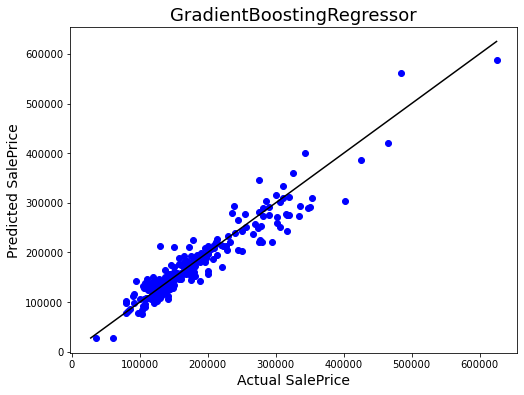

In [189]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, best_pred, color='b')
plt1 = max(max(best_pred), max(y_test))
plt2 = min(min(best_pred), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'black')
plt.xlabel('Actual SalePrice', fontsize=14)
plt.ylabel('Predicted SalePrice', fontsize=14)
plt.title('GradientBoostingRegressor',fontsize=18)
plt.show()

Here after hyper parameter tunning we can see most of the datapoints are close to best fit line and we got the final r2 score as 90% which very good.

# Saving Model

In [150]:
import pickle
filename = 'Housing_case_Project.pkl'
pickle.dump(final, open(filename, 'wb'))

# Data Pre-processing for test dataset

In [151]:
test=pd.read_csv('Downloads/Project-Housing--2---1-/Project-Housing_splitted/test.csv')

In [152]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [153]:
# Checking the shape of dataset.
test.shape

(292, 80)

In [154]:
# Checking the Shape of the dataset.
test.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

In [190]:
# Checking the dataset summary.
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    float64
 1   MSZoning       292 non-null    float64
 2   LotFrontage    292 non-null    float64
 3   LotArea        292 non-null    float64
 4   Street         292 non-null    float64
 5   LotShape       292 non-null    float64
 6   LandContour    292 non-null    float64
 7   LotConfig      292 non-null    float64
 8   LandSlope      292 non-null    float64
 9   Neighborhood   292 non-null    float64
 10  Condition1     292 non-null    float64
 11  Condition2     292 non-null    float64
 12  BldgType       292 non-null    float64
 13  HouseStyle     292 non-null    float64
 14  OverallQual    292 non-null    int64  
 15  OverallCond    292 non-null    float64
 16  YearBuilt      292 non-null    int64  
 17  YearRemodAdd   292 non-null    int64  
 18  RoofStyle 

In [156]:
# Dropping the irrelevent columns as they are of no use in model building
test.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis=1, inplace=True)

# Dropping the irrelevent columns as they are of no use in model building
test.drop(["Id", "Utilities"], axis=1, inplace=True)


In [157]:
for i in mode:
    test[i] = test[i].fillna(test[i].mode()[0])
    
for j in mean:
    test[j] = test[j].fillna(test[j].mean())
    
print(test.isnull().sum())

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 73, dtype: int64


In [158]:
#There is one single null value present in Electrical column we can fill it with mode
test['Electrical'] = test['Electrical'].fillna(test['Electrical'].mode()[0])

In [159]:
# Checking the null values after handling the null values.
test.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 73, dtype: int64

In [160]:
test.dropna(inplace=True)

In [161]:
numerics_data = []
for x in test.dtypes.index:
    if test.dtypes[x] == 'int64' or test.dtypes[x] == 'float64':
        numerics_data.append(x)
print(f"\nNumeric Data:", numerics_data)


Numeric Data: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [162]:
# Checking the skewness in numerical column.
test[numerics_data].skew()

MSSubClass        1.358597
LotFrontage       0.466813
LotArea          12.781805
OverallQual       0.397312
OverallCond       1.209714
YearBuilt        -0.755233
YearRemodAdd     -0.535600
MasVnrArea        1.976804
BsmtFinSF1        0.739790
BsmtFinSF2        3.698543
BsmtUnfSF         0.960708
TotalBsmtSF       0.519257
1stFlrSF          0.692047
2ndFlrSF          0.765511
LowQualFinSF     10.929928
GrLivArea         1.010586
BsmtFullBath      0.463685
BsmtHalfBath      3.544994
FullBath         -0.049800
HalfBath          0.758892
BedroomAbvGr      0.075315
KitchenAbvGr      4.849432
TotRmsAbvGrd      0.805535
Fireplaces        0.540164
GarageYrBlt      -0.683042
GarageCars       -0.280324
GarageArea        0.133547
WoodDeckSF        1.708221
OpenPorchSF       2.185030
EnclosedPorch     3.177046
3SsnPorch        12.277476
ScreenPorch       4.182351
PoolArea          0.000000
MiscVal          13.264758
MoSold            0.186504
YrSold            0.018412
dtype: float64

In [ ]:
Here we can see skewness in some columns and we will remove it using powertransformation('yeo-johnson method')

In [163]:
remove= ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'Fireplaces', 'GarageCars']


In [164]:
from sklearn.preprocessing import PowerTransformer
scale = PowerTransformer(method='yeo-johnson')

In [165]:
test[remove] = scale.fit_transform(test[remove].values)
test[remove].head()

,MSSubClass,LotFrontage,LotArea,OverallCond,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,Fireplaces,GarageCars
0,-1.149768,0.982253,0.842656,-0.387299,1.182923,1.931242,1.814725,-0.870294,1.170981,-0.263813,0.777618,0.808861,1.777376
1,1.337666,0.035790,-0.739104,-0.387299,-0.846534,0.451268,0.726749,-0.870294,1.170981,-0.263813,-1.051784,0.808861,0.330046
2,-1.149768,0.035790,0.524304,-0.387299,-0.846534,1.587714,1.586900,-0.870294,-0.846389,-0.263813,0.777618,0.808861,0.330046
3,0.705404,0.457389,0.548484,1.397520,-0.846534,-0.761116,-0.705442,1.137231,-0.846389,-0.263813,-1.051784,0.808861,-0.988015
4,0.507343,0.982253,0.897263,-0.387299,0.952580,-0.297412,-0.584696,1.211129,-0.846389,-0.263813,0.777618,0.808861,1.777376


In [166]:
test[numerics_data].skew()


MSSubClass        0.089921
LotFrontage       0.096846
LotArea           0.003111
OverallQual       0.397312
OverallCond      -0.079098
YearBuilt        -0.755233
YearRemodAdd     -0.535600
MasVnrArea        0.363253
BsmtFinSF1        0.739790
BsmtFinSF2        3.698543
BsmtUnfSF         0.960708
TotalBsmtSF      -0.037982
1stFlrSF         -0.000548
2ndFlrSF          0.284246
LowQualFinSF     10.929928
GrLivArea         1.010586
BsmtFullBath      0.341330
BsmtHalfBath      3.544994
FullBath         -0.064123
HalfBath          0.758892
BedroomAbvGr      0.075315
KitchenAbvGr      4.849432
TotRmsAbvGrd      0.805535
Fireplaces        0.076669
GarageYrBlt      -0.683042
GarageCars       -0.030495
GarageArea        0.133547
WoodDeckSF        1.708221
OpenPorchSF       2.185030
EnclosedPorch     3.177046
3SsnPorch        12.277476
ScreenPorch       4.182351
PoolArea          0.000000
MiscVal          13.264758
MoSold            0.186504
YrSold            0.018412
dtype: float64

We have successfully removed the skewness from the dataset

In [167]:
# Ordinal Encoder

od = OrdinalEncoder()
def ordinal_encode(test, column):
    test[column] = od.fit_transform(test[column])
    return test

X=ordinal_encode(test, object_data)
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-1.149768,2.0,0.982253,0.842656,1.0,0.0,1.0,0.0,0.0,21.0,...,51,0,0,0,0,0,7,2007,5.0,2.0
1,1.337666,2.0,0.035790,-0.739104,1.0,0.0,3.0,1.0,0.0,21.0,...,0,0,0,0,0,0,8,2009,0.0,0.0
2,-1.149768,2.0,0.035790,0.524304,1.0,3.0,3.0,4.0,0.0,4.0,...,151,0,0,0,0,0,6,2009,5.0,2.0
3,0.705404,2.0,0.457389,0.548484,1.0,3.0,0.0,4.0,0.0,5.0,...,0,0,0,0,0,0,7,2009,5.0,2.0
4,0.507343,2.0,0.982253,0.897263,1.0,0.0,3.0,1.0,0.0,20.0,...,18,0,0,0,0,0,1,2008,5.0,2.0


In [168]:
# Data Scaling
scalers = StandardScaler()
X = pd.DataFrame(scalers.fit_transform(X), columns=X.columns)
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-1.149768,-0.287006,0.982253,0.842656,0.083045,-1.402669,-2.566101,-2.001106,-0.226274,1.554460,...,0.059897,-0.341845,-0.082453,-0.258624,0.0,-0.126021,0.276960,-0.650908,0.23029,0.148654
1,1.337666,-0.287006,0.035790,-0.739104,0.083045,-1.402669,0.299297,-1.351136,-0.226274,1.554460,...,-0.715738,-0.341845,-0.082453,-0.258624,0.0,-0.126021,0.637997,0.863555,-6.49418,-3.323909
2,-1.149768,-0.287006,0.035790,0.524304,0.083045,0.745474,0.299297,0.598774,-0.226274,-1.281387,...,1.580750,-0.341845,-0.082453,-0.258624,0.0,-0.126021,-0.084077,0.863555,0.23029,0.148654
3,0.705404,-0.287006,0.457389,0.548484,0.083045,0.745474,-3.998799,0.598774,-0.226274,-1.114572,...,-0.715738,-0.341845,-0.082453,-0.258624,0.0,-0.126021,0.276960,0.863555,0.23029,0.148654
4,0.507343,-0.287006,0.982253,0.897263,0.083045,-1.402669,0.299297,-1.351136,-0.226274,1.387645,...,-0.441985,-0.341845,-0.082453,-0.258624,0.0,-0.126021,-1.889261,0.106324,0.23029,0.148654


In [169]:
# Dropping GrLivArea column as it contains high VIF value
X.drop(["GrLivArea"],axis=1,inplace=True)

In [170]:
# Predicting the Item_Outlet_Sales from the feature columns of our Testing dataset

Predicted_Sales = final.predict(X)
predicted_output = pd.DataFrame()
predicted_output['SalePrice']=Predicted_Sales
predicted_output.head(20) 

,SalePrice
0,302851.772230
1,222087.297552
2,250774.950426
3,178872.857295
4,225435.910044
5,93283.801768
6,127433.705372
7,310367.746169
8,262662.715218
9,160128.784189


In [171]:
final_test = pd.concat([test, predicted_output], axis=1)
final_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.149768,2.0,0.982253,0.842656,1.0,0.0,1.0,0.0,0.0,21.0,...,0,0,0,0,0,7,2007,5.0,2.0,302851.772230
1,1.337666,2.0,0.035790,-0.739104,1.0,0.0,3.0,1.0,0.0,21.0,...,0,0,0,0,0,8,2009,0.0,0.0,222087.297552
2,-1.149768,2.0,0.035790,0.524304,1.0,3.0,3.0,4.0,0.0,4.0,...,0,0,0,0,0,6,2009,5.0,2.0,250774.950426
3,0.705404,2.0,0.457389,0.548484,1.0,3.0,0.0,4.0,0.0,5.0,...,0,0,0,0,0,7,2009,5.0,2.0,178872.857295
4,0.507343,2.0,0.982253,0.897263,1.0,0.0,3.0,1.0,0.0,20.0,...,0,0,0,0,0,1,2008,5.0,2.0,225435.910044


In [172]:
# Saving the predicted data to csv format.
final_test.to_csv("Predicted_Data.csv", index=False)